<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/team-project/modeling-dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# data path
dpath = "/content/drive/MyDrive/"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# H1N1 Model.ver1

In [4]:
train_h1n1_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_h1n1_ver1.csv')

In [5]:
print(train_h1n1_ver1.shape)
train_h1n1_ver1.head()

(24828, 24)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,2.0,4,1,1,8,1,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,4.0,4.0,2,1,2,1,2,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1,1,2,9,2,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3.0,5.0,5,1,1,5,3,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,2.0,3,1,1,9,2,1.0,0.0,0


In [6]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_h1n1_ver1.iloc[:,1:-1]
target = train_h1n1_ver1['h1n1_vaccine']

x_train_h1n1_ver1, x_valid_h1n1_ver1, y_train_h1n1_ver1, y_valid_h1n1_ver1 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_s = keras.Sequential([
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_s.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_s = model_h1n1_ver1_s.fit(x_train_h1n1_ver1,
                                            y_train_h1n1_ver1,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 9ms/step - loss: 0.6084 - accuracy: 0.6838 - val_loss: 0.5241 - val_accuracy: 0.7861
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.7865 - val_loss: 0.4934 - val_accuracy: 0.7874
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4868 - accuracy: 0.7891 - val_loss: 0.4845 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4767 - accuracy: 0.7916 - val_loss: 0.4801 - val_accuracy: 0.7894
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.7943 - val_loss: 0.4753 - val_accuracy: 0.7942
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.7970 - val_loss: 0.4720 - val_accuracy: 0.7948
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4613 - accuracy: 0.8003 - val_loss: 0.4714 - val_accuracy: 0.7940
Epoch 8/20
39/39 [==

**layer 8개**


In [8]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_b = keras.Sequential([
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(128, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_b.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_b = model_h1n1_ver1_b.fit(x_train_h1n1_ver1,
                                            y_train_h1n1_ver1,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 24ms/step - loss: 0.5081 - accuracy: 0.7780 - val_loss: 0.4755 - val_accuracy: 0.7920
Epoch 2/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4679 - accuracy: 0.7957 - val_loss: 0.4651 - val_accuracy: 0.8031
Epoch 3/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4620 - accuracy: 0.7997 - val_loss: 0.4609 - val_accuracy: 0.8053
Epoch 4/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4570 - accuracy: 0.8019 - val_loss: 0.4940 - val_accuracy: 0.7960
Epoch 5/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4514 - accuracy: 0.8046 - val_loss: 0.4779 - val_accuracy: 0.8055
Epoch 6/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4459 - accuracy: 0.8083 - val_loss: 0.4545 - val_accuracy: 0.8049
Epoch 7/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4422 - accuracy: 0.8092 - val_loss: 0.4617 - val_accuracy: 0.8079
Epoch 8/20
39

#### visualize

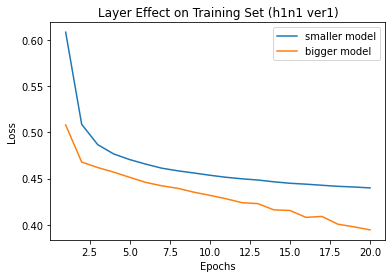

In [9]:
# Layer effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_s = history_h1n1_ver1_s.history
history_dict_h1n1_ver1_b = history_h1n1_ver1_b.history

loss_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["loss"]
loss_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["loss"]

epochs = range(1, len(loss_values_h1n1_ver1_s) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, loss_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer Effect on Training Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

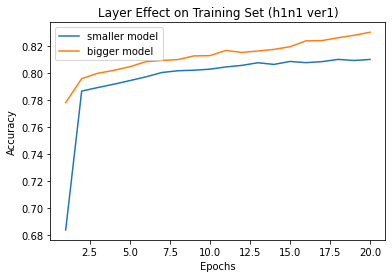

In [10]:
# Layer effect on training accuracy


import matplotlib.pyplot as plt



acc_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["accuracy"]
acc_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_s) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, acc_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer Effect on Training Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

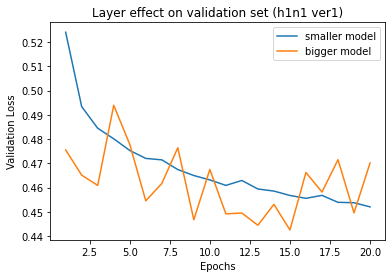

In [11]:
# Layer effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["val_loss"]
val_loss_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["val_loss"]

epochs = range(1, len(val_loss_values_h1n1_ver1_s) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, val_loss_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer effect on validation set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

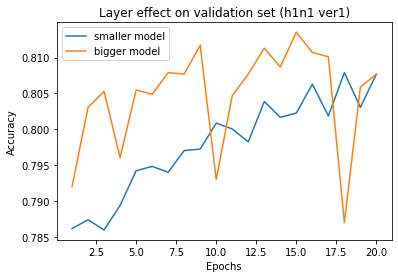

In [12]:
# Layer effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["val_accuracy"]
val_acc_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["val_accuracy"]

epochs = range(1, len(val_acc_values_h1n1_ver1_s) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, val_acc_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer effect on validation set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

- model with 8 layer(bigger model) shows small loss and high accuracy

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_1 = model_h1n1_ver1_L1_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 3s 31ms/step - loss: 1.8930 - accuracy: 0.7718 - val_loss: 1.3688 - val_accuracy: 0.7857
Epoch 2/20
39/39 [==============================] - 1s 18ms/step - loss: 1.0653 - accuracy: 0.7926 - val_loss: 0.7949 - val_accuracy: 0.8023
Epoch 3/20
39/39 [==============================] - 1s 17ms/step - loss: 0.6539 - accuracy: 0.7979 - val_loss: 0.5600 - val_accuracy: 0.8041
Epoch 4/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5312 - accuracy: 0.7992 - val_loss: 0.5200 - val_accuracy: 0.8025
Epoch 5/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5025 - accuracy: 0.8030 - val_loss: 0.4987 - val_accuracy: 0.8051
Epoch 6/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4879 - accuracy: 0.8036 - val_loss: 0.4901 - val_accuracy: 0.8061
Epoch 7/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4824 - accuracy: 0.8055 - val_loss: 0.4850 - val_accuracy: 0.8083
Epoch 8/20
39

**layer 8개 + L1 regularization 2개**

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_2 = model_h1n1_ver1_L1_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 25ms/step - loss: 1.9836 - accuracy: 0.7856 - val_loss: 1.4502 - val_accuracy: 0.7916
Epoch 2/20
39/39 [==============================] - 1s 16ms/step - loss: 1.1345 - accuracy: 0.7928 - val_loss: 0.8552 - val_accuracy: 0.7988
Epoch 3/20
39/39 [==============================] - 1s 17ms/step - loss: 0.7098 - accuracy: 0.7957 - val_loss: 0.6067 - val_accuracy: 0.8037
Epoch 4/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5728 - accuracy: 0.7989 - val_loss: 0.5544 - val_accuracy: 0.7948
Epoch 5/20
39/39 [==============================] - 1s 18ms/step - loss: 0.5294 - accuracy: 0.8046 - val_loss: 0.5293 - val_accuracy: 0.7966
Epoch 6/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5119 - accuracy: 0.8017 - val_loss: 0.5074 - val_accuracy: 0.8079
Epoch 7/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4967 - accuracy: 0.8051 - val_loss: 0.4989 - val_accuracy: 0.8073
Epoch 8/20
39

**layer 8개 + L2 regularization 1개**

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_1 = model_h1n1_ver1_L2_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 3s 39ms/step - loss: 0.6454 - accuracy: 0.7580 - val_loss: 0.5589 - val_accuracy: 0.7900
Epoch 2/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5385 - accuracy: 0.7940 - val_loss: 0.5149 - val_accuracy: 0.8051
Epoch 3/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4998 - accuracy: 0.7999 - val_loss: 0.5259 - val_accuracy: 0.7936
Epoch 4/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4836 - accuracy: 0.8011 - val_loss: 0.4808 - val_accuracy: 0.8041
Epoch 5/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4706 - accuracy: 0.8029 - val_loss: 0.4728 - val_accuracy: 0.8049
Epoch 6/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4602 - accuracy: 0.8079 - val_loss: 0.4727 - val_accuracy: 0.8061
Epoch 7/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4555 - accuracy: 0.8089 - val_loss: 0.4670 - val_accuracy: 0.8077
Epoch 8/20
39

**layer 8개 + L2 regularization 2개**

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_2 = model_h1n1_ver1_L2_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 23ms/step - loss: 0.6484 - accuracy: 0.7734 - val_loss: 0.5822 - val_accuracy: 0.7888
Epoch 2/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5498 - accuracy: 0.7954 - val_loss: 0.5298 - val_accuracy: 0.8004
Epoch 3/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5123 - accuracy: 0.7975 - val_loss: 0.4992 - val_accuracy: 0.8039
Epoch 4/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4855 - accuracy: 0.8045 - val_loss: 0.4868 - val_accuracy: 0.8067
Epoch 5/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4766 - accuracy: 0.8054 - val_loss: 0.4779 - val_accuracy: 0.8065
Epoch 6/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4660 - accuracy: 0.8067 - val_loss: 0.4783 - val_accuracy: 0.8041
Epoch 7/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4571 - accuracy: 0.8072 - val_loss: 0.4828 - val_accuracy: 0.8069
Epoch 8/20
39

**layer 8개 + L1&L2 regularization 2개**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L12 = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L12.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L12 = model_h1n1_ver1_L12.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 23ms/step - loss: 2.1710 - accuracy: 0.7741 - val_loss: 1.6294 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 24ms/step - loss: 1.2668 - accuracy: 0.7926 - val_loss: 0.9562 - val_accuracy: 0.7916
Epoch 3/20
39/39 [==============================] - 1s 27ms/step - loss: 0.7788 - accuracy: 0.7993 - val_loss: 0.6550 - val_accuracy: 0.7994
Epoch 4/20
39/39 [==============================] - 1s 29ms/step - loss: 0.6088 - accuracy: 0.8016 - val_loss: 0.5804 - val_accuracy: 0.8025
Epoch 5/20
39/39 [==============================] - 1s 30ms/step - loss: 0.5526 - accuracy: 0.8010 - val_loss: 0.5432 - val_accuracy: 0.8027
Epoch 6/20
39/39 [==============================] - 1s 28ms/step - loss: 0.5230 - accuracy: 0.8027 - val_loss: 0.5333 - val_accuracy: 0.7853
Epoch 7/20
39/39 [==============================] - 1s 33ms/step - loss: 0.5050 - accuracy: 0.8077 - val_loss: 0.5054 - val_accuracy: 0.8029
Epoch 8/20
39

### visualize

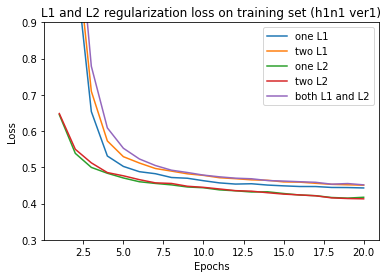

In [18]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_L1_1 = history_h1n1_ver1_L1_1.history
history_dict_h1n1_ver1_L1_2 = history_h1n1_ver1_L1_2.history
history_dict_h1n1_ver1_L2_1 = history_h1n1_ver1_L2_1.history
history_dict_h1n1_ver1_L2_2 = history_h1n1_ver1_L2_2.history
history_dict_h1n1_ver1_L12 = history_h1n1_ver1_L12.history

loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["loss"]
loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["loss"]
loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["loss"]
loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["loss"]
loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["loss"]


epochs = range(1, len(loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, loss_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, loss_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, loss_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, loss_values_h1n1_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 regularization loss on training set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.9])
plt.legend()
plt.show()

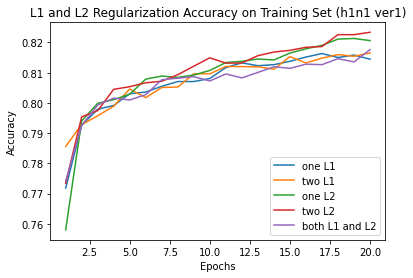

In [19]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["accuracy"]
acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["accuracy"]
acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["accuracy"]
acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["accuracy"]
acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, acc_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, acc_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, acc_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, acc_values_h1n1_ver1_L12, label="both L1 and L2")

plt.title("L1 and L2 Regularization Accuracy on Training Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

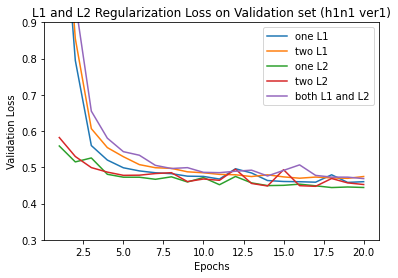

In [20]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_loss"]
val_loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_loss"]
val_loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_loss"]
val_loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_loss"]
val_loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_h1n1_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.3,0.9])
plt.legend()
plt.show()

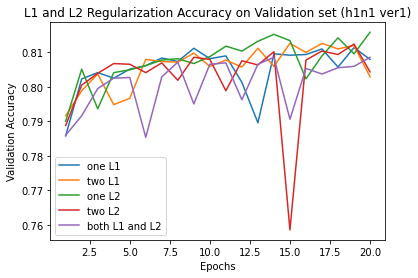

In [21]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt

val_acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_accuracy"]
val_acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_accuracy"]
val_acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_accuracy"]
val_acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_accuracy"]
val_acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_h1n1_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Validation set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

- model with L2 regularization shows the best result

## **Hyperparameter effect**

**0.005**

In [22]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_one = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_one.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_one = model_h1n1_ver1_one.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 21ms/step - loss: 1.1261 - accuracy: 0.7786 - val_loss: 0.8572 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 16ms/step - loss: 0.7314 - accuracy: 0.7934 - val_loss: 0.6247 - val_accuracy: 0.7994
Epoch 3/20
39/39 [==============================] - 1s 16ms/step - loss: 0.5705 - accuracy: 0.7979 - val_loss: 0.5329 - val_accuracy: 0.8043
Epoch 4/20
39/39 [==============================] - 1s 16ms/step - loss: 0.5126 - accuracy: 0.7997 - val_loss: 0.5041 - val_accuracy: 0.7994
Epoch 5/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4875 - accuracy: 0.8038 - val_loss: 0.4912 - val_accuracy: 0.8067
Epoch 6/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4730 - accuracy: 0.8047 - val_loss: 0.4871 - val_accuracy: 0.8012
Epoch 7/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4638 - accuracy: 0.8044 - val_loss: 0.4868 - val_accuracy: 0.8055
Epoch 8/20
39

**0.002**

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_two = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_two.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_two = model_h1n1_ver1_two.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 22ms/step - loss: 0.8087 - accuracy: 0.7291 - val_loss: 0.6654 - val_accuracy: 0.7894
Epoch 2/20
39/39 [==============================] - 1s 17ms/step - loss: 0.6103 - accuracy: 0.7942 - val_loss: 0.5774 - val_accuracy: 0.7924
Epoch 3/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5335 - accuracy: 0.7976 - val_loss: 0.5164 - val_accuracy: 0.7964
Epoch 4/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4990 - accuracy: 0.8048 - val_loss: 0.4959 - val_accuracy: 0.7932
Epoch 5/20
39/39 [==============================] - 1s 15ms/step - loss: 0.4801 - accuracy: 0.8033 - val_loss: 0.5016 - val_accuracy: 0.7990
Epoch 6/20
39/39 [==============================] - 1s 15ms/step - loss: 0.4695 - accuracy: 0.8025 - val_loss: 0.4809 - val_accuracy: 0.8061
Epoch 7/20
39/39 [==============================] - 1s 15ms/step - loss: 0.4622 - accuracy: 0.8047 - val_loss: 0.4790 - val_accuracy: 0.8031
Epoch 8/20
39

**0.001(original)**

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_three = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_three.compile(optimizer = "rmsprop",
                               loss = "binary_crossentropy",
                               metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_three = model_h1n1_ver1_three.fit(x_train_h1n1_ver1,
                                                     y_train_h1n1_ver1,
                                                     epochs = 20,
                                                     batch_size = 512,
                                                     validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 21ms/step - loss: 0.6541 - accuracy: 0.7761 - val_loss: 0.5759 - val_accuracy: 0.7936
Epoch 2/20
39/39 [==============================] - 1s 16ms/step - loss: 0.5502 - accuracy: 0.7949 - val_loss: 0.5416 - val_accuracy: 0.7952
Epoch 3/20
39/39 [==============================] - 1s 16ms/step - loss: 0.5094 - accuracy: 0.7990 - val_loss: 0.4985 - val_accuracy: 0.8069
Epoch 4/20
39/39 [==============================] - 1s 15ms/step - loss: 0.4875 - accuracy: 0.8017 - val_loss: 0.4914 - val_accuracy: 0.8029
Epoch 5/20
39/39 [==============================] - 1s 15ms/step - loss: 0.4760 - accuracy: 0.8054 - val_loss: 0.4920 - val_accuracy: 0.8014
Epoch 6/20
39/39 [==============================] - 1s 15ms/step - loss: 0.4686 - accuracy: 0.8046 - val_loss: 0.4748 - val_accuracy: 0.8047
Epoch 7/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4573 - accuracy: 0.8076 - val_loss: 0.4808 - val_accuracy: 0.8093
Epoch 8/20
39

**0.0005**

In [25]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_four = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_four.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_four = model_h1n1_ver1_four.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 21ms/step - loss: 0.5804 - accuracy: 0.7846 - val_loss: 0.5293 - val_accuracy: 0.7865
Epoch 2/20
39/39 [==============================] - 1s 15ms/step - loss: 0.5137 - accuracy: 0.7970 - val_loss: 0.5032 - val_accuracy: 0.8045
Epoch 3/20
39/39 [==============================] - 1s 15ms/step - loss: 0.4939 - accuracy: 0.7972 - val_loss: 0.4895 - val_accuracy: 0.7992
Epoch 4/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4781 - accuracy: 0.8015 - val_loss: 0.4828 - val_accuracy: 0.8057
Epoch 5/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4692 - accuracy: 0.8038 - val_loss: 0.4892 - val_accuracy: 0.8041
Epoch 6/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4599 - accuracy: 0.8053 - val_loss: 0.4660 - val_accuracy: 0.8105
Epoch 7/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4532 - accuracy: 0.8106 - val_loss: 0.4646 - val_accuracy: 0.8049
Epoch 8/20
39

**0.0001**

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_five = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_five.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_five = model_h1n1_ver1_five.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 21ms/step - loss: 0.5294 - accuracy: 0.7718 - val_loss: 0.4896 - val_accuracy: 0.7950
Epoch 2/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4834 - accuracy: 0.7959 - val_loss: 0.4825 - val_accuracy: 0.7960
Epoch 3/20
39/39 [==============================] - 1s 15ms/step - loss: 0.4730 - accuracy: 0.7970 - val_loss: 0.4725 - val_accuracy: 0.8025
Epoch 4/20
39/39 [==============================] - 1s 15ms/step - loss: 0.4630 - accuracy: 0.8018 - val_loss: 0.4649 - val_accuracy: 0.8057
Epoch 5/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4591 - accuracy: 0.8055 - val_loss: 0.4631 - val_accuracy: 0.8069
Epoch 6/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4552 - accuracy: 0.8075 - val_loss: 0.4820 - val_accuracy: 0.8035
Epoch 7/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4487 - accuracy: 0.8085 - val_loss: 0.4775 - val_accuracy: 0.8075
Epoch 8/20
39

### visualize

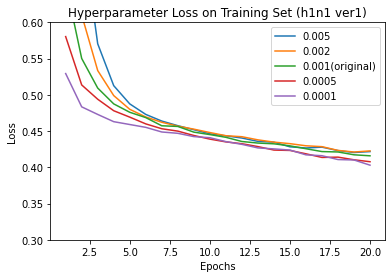

In [27]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_one = history_h1n1_ver1_one.history
history_dict_h1n1_ver1_two = history_h1n1_ver1_two.history
history_dict_h1n1_ver1_three = history_h1n1_ver1_three.history
history_dict_h1n1_ver1_four = history_h1n1_ver1_four.history
history_dict_h1n1_ver1_five = history_h1n1_ver1_five.history

loss_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["loss"]
loss_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["loss"]
loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["loss"]
loss_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["loss"]
loss_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["loss"]


epochs = range(1, len(loss_values_h1n1_ver1_one) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, loss_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, loss_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, loss_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, loss_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.6])
plt.legend()
plt.show()

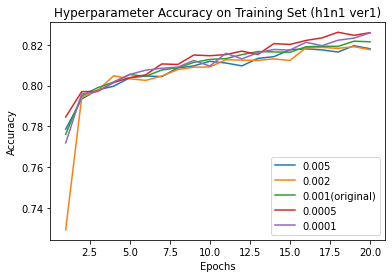

In [28]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["accuracy"]
acc_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["accuracy"]
acc_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["accuracy"]
acc_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["accuracy"]
acc_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_one) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, acc_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, acc_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, acc_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, acc_values_h1n1_ver1_five, label="0.0001")

plt.title("Hyperparameter Accuracy on Training Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

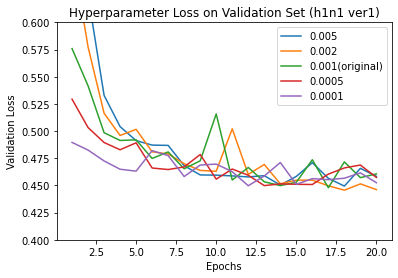

In [29]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["val_loss"]
val_loss_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["val_loss"]
val_loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["val_loss"]
val_loss_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["val_loss"]
val_loss_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_one) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, val_loss_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, val_loss_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, val_loss_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

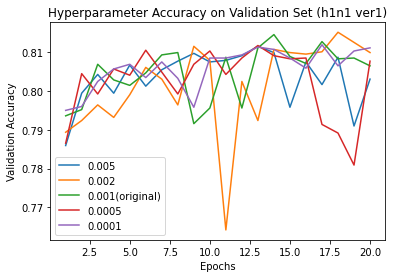

In [30]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["val_accuracy"]
val_acc_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["val_accuracy"]
val_acc_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["val_accuracy"]
val_acc_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["val_accuracy"]
val_acc_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_one) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, val_acc_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, val_acc_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, val_acc_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

- Too small weight hyperparameter applies weak regularization, and too big weight hyperparameter does not fit well
- So, we considered 0.001 as our weight hyperparameter in all four cases. 

## **Dropout effect**

**# dropout = 1**

In [31]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_onedr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_onedr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_onedr = model_h1n1_ver1_onedr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 22ms/step - loss: 0.6456 - accuracy: 0.7842 - val_loss: 0.6104 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 16ms/step - loss: 0.5529 - accuracy: 0.7876 - val_loss: 0.5262 - val_accuracy: 0.7998
Epoch 3/20
39/39 [==============================] - 1s 16ms/step - loss: 0.5139 - accuracy: 0.7955 - val_loss: 0.5497 - val_accuracy: 0.7801
Epoch 4/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4931 - accuracy: 0.8009 - val_loss: 0.4983 - val_accuracy: 0.7964
Epoch 5/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4777 - accuracy: 0.8049 - val_loss: 0.4798 - val_accuracy: 0.8059
Epoch 6/20
39/39 [==============================] - 1s 29ms/step - loss: 0.4690 - accuracy: 0.8038 - val_loss: 0.4737 - val_accuracy: 0.8073
Epoch 7/20
39/39 [==============================] - 1s 19ms/step - loss: 0.4612 - accuracy: 0.8087 - val_loss: 0.5100 - val_accuracy: 0.7634
Epoch 8/20
39

**# dropout = 2**

In [32]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_twodr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_twodr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_twodr = model_h1n1_ver1_twodr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 23ms/step - loss: 0.6727 - accuracy: 0.7766 - val_loss: 0.5801 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 18ms/step - loss: 0.5731 - accuracy: 0.7859 - val_loss: 0.5467 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5307 - accuracy: 0.7860 - val_loss: 0.5718 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 1s 16ms/step - loss: 0.5089 - accuracy: 0.7908 - val_loss: 0.5087 - val_accuracy: 0.8033
Epoch 5/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4913 - accuracy: 0.7981 - val_loss: 0.5183 - val_accuracy: 0.7851
Epoch 6/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4811 - accuracy: 0.8013 - val_loss: 0.4816 - val_accuracy: 0.8071
Epoch 7/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4676 - accuracy: 0.8036 - val_loss: 0.4775 - val_accuracy: 0.8063
Epoch 8/20
39

**# dropout = 3**

In [36]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_threedr = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_threedr.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_threedr = model_h1n1_ver1_threedr.fit(x_train_h1n1_ver1,
                                                        y_train_h1n1_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 23ms/step - loss: 0.6953 - accuracy: 0.7650 - val_loss: 0.6155 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 16ms/step - loss: 0.5915 - accuracy: 0.7856 - val_loss: 0.5352 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5421 - accuracy: 0.7859 - val_loss: 0.5128 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5181 - accuracy: 0.7859 - val_loss: 0.5006 - val_accuracy: 0.7859
Epoch 5/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5007 - accuracy: 0.7860 - val_loss: 0.4920 - val_accuracy: 0.7859
Epoch 6/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4886 - accuracy: 0.7867 - val_loss: 0.5173 - val_accuracy: 0.7859
Epoch 7/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4832 - accuracy: 0.7911 - val_loss: 0.4779 - val_accuracy: 0.7870
Epoch 8/20
39

### visualize

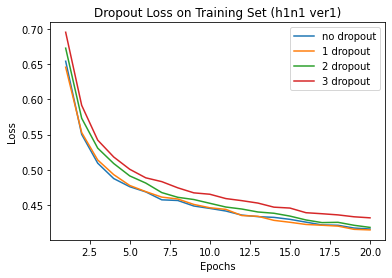

In [37]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_h1n1_ver1_three = history_h1n1_ver1_three.history
loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["loss"]


history_dict_h1n1_ver1_onedr = history_h1n1_ver1_onedr.history
history_dict_h1n1_ver1_twodr = history_h1n1_ver1_twodr.history
history_dict_h1n1_ver1_threedr = history_h1n1_ver1_threedr.history

loss_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["loss"]
loss_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["loss"]
loss_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["loss"]

epochs = range(1, len(loss_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_three, label="no dropout")
plt.plot(epochs, loss_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, loss_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, loss_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

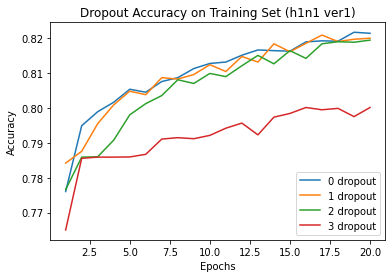

In [38]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["accuracy"]
acc_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["accuracy"]
acc_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_three, label="0 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

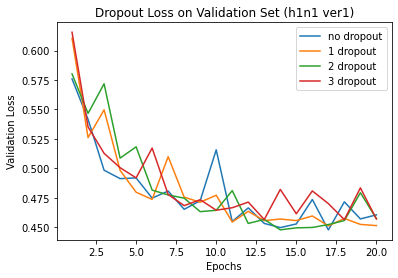

In [39]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["val_loss"]
val_loss_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["val_loss"]
val_loss_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["val_loss"]
val_loss_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_three, label="no dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

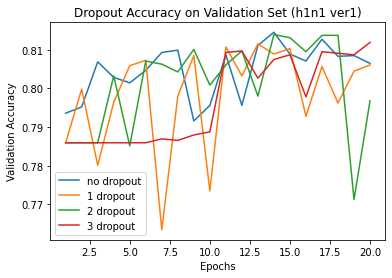

In [40]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["val_accuracy"]
val_acc_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["val_accuracy"]
val_acc_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_three, label="no dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_threedr, label="3 dropout")


plt.title("Dropout Accuracy on Validation Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

- model with 1 or 2 dropout layers is robust from overfitting as well as have relatively small loss

# H1N1 Model.ver2

In [41]:
train_h1n1_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_h1n1_ver2.csv')

In [42]:
print(train_h1n1_ver2.shape)
train_h1n1_ver2.head()

(24828, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,1,0


In [43]:
train_h1n1_ver2.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'age_group', 'sex',
       'household_adults', 'household_children', 'h1n1_vaccine', 'race_1',
       'race_2', 'race_3', 'race_4', 'region_0', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'msa_1', 'msa_2', 'msa_3'],
      dtype='object')

In [44]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_h1n1_ver2.iloc[:,1:-1]
target = train_h1n1_ver2['h1n1_vaccine']

x_train_h1n1_ver2, x_valid_h1n1_ver2, y_train_h1n1_ver2, y_valid_h1n1_ver2 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [45]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_s = keras.Sequential([
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_s.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_s = model_h1n1_ver2_s.fit(x_train_h1n1_ver2,
                                            y_train_h1n1_ver2,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.5333 - accuracy: 0.7813 - val_loss: 0.4692 - val_accuracy: 0.7874
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4271 - accuracy: 0.8064 - val_loss: 0.3756 - val_accuracy: 0.8421
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.8694 - val_loss: 0.2769 - val_accuracy: 0.8987
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.2290 - accuracy: 0.9294 - val_loss: 0.1890 - val_accuracy: 0.9414
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1499 - accuracy: 0.9696 - val_loss: 0.1182 - val_accuracy: 0.9817
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0888 - accuracy: 0.9927 - val_loss: 0.0652 - val_accuracy: 0.9976
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9985 - val_loss: 0.0335 - val_accuracy: 0.9998
Epoch 8/20
39/39 [==

**layer 8개**

In [46]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_b = keras.Sequential([
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(128, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_b.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_b = model_h1n1_ver2_b.fit(x_train_h1n1_ver2,
                                            y_train_h1n1_ver2,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 2s 24ms/step - loss: 0.4096 - accuracy: 0.8218 - val_loss: 0.1361 - val_accuracy: 0.9809
Epoch 2/20
39/39 [==============================] - 1s 17ms/step - loss: 0.0633 - accuracy: 0.9877 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 3/20
39/39 [==============================] - 1s 17ms/step - loss: 0.0702 - accuracy: 0.9936 - val_loss: 3.9029e-04 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 17ms/step - loss: 1.1494e-04 - accuracy: 1.0000 - val_loss: 3.0576e-05 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 17ms/step - loss: 7.9206e-06 - accuracy: 1.0000 - val_loss: 2.6275e-06 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 16ms/step - loss: 8.7285e-07 - accuracy: 1.0000 - val_loss: 3.8099e-07 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 17ms/step - loss: 1.2357e-07 - accuracy: 1.0000 - val_loss: 9.8626e-08 

### visualize

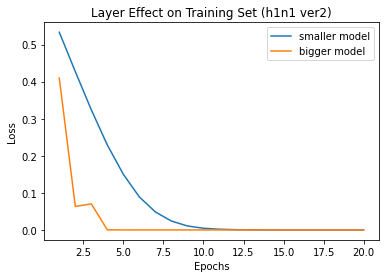

In [47]:
# Layer effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_s = history_h1n1_ver2_s.history
history_dict_h1n1_ver2_b = history_h1n1_ver2_b.history

loss_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["loss"]
loss_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["loss"]

epochs = range(1, len(loss_values_h1n1_ver2_s) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, loss_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

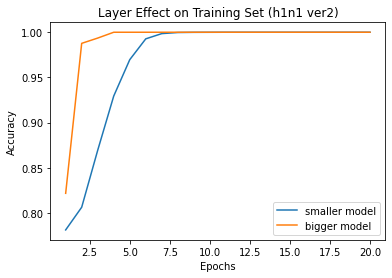

In [48]:
# Layer effect on training accuracy


import matplotlib.pyplot as plt



acc_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["accuracy"]
acc_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_s) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, acc_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

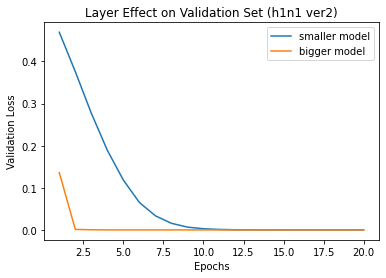

In [49]:
# Layer effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["val_loss"]
val_loss_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["val_loss"]

epochs = range(1, len(val_loss_values_h1n1_ver2_s) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, val_loss_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

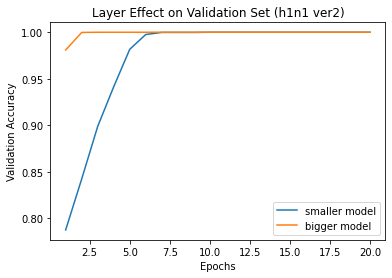

In [50]:
# Layer effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["val_accuracy"]
val_acc_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["val_accuracy"]

epochs = range(1, len(val_acc_values_h1n1_ver2_s) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, val_acc_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **L1, L2 regularization effect**

**layer 3개 + L1 regularization 1개**

In [51]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L1_1 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L1_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L1_1 = model_h1n1_ver2_L1_1.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.5948 - accuracy: 0.7859 - val_loss: 0.5312 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.8057 - val_loss: 0.4316 - val_accuracy: 0.8319
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.3783 - accuracy: 0.8783 - val_loss: 0.3298 - val_accuracy: 0.9166
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.9422 - val_loss: 0.2322 - val_accuracy: 0.9674
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1883 - accuracy: 0.9829 - val_loss: 0.1527 - val_accuracy: 0.9883
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1221 - accuracy: 0.9978 - val_loss: 0.0982 - val_accuracy: 0.9998
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0821 - accuracy: 0.9998 - val_loss: 0.0686 - val_accuracy: 1.0000
Epoch 8/20
39/39 [==

**layer 3개 + L1 regularization 2개**

In [52]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers



# building model

model_h1n1_ver2_L1_2 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L1_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L1_2 = model_h1n1_ver2_L1_2.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.7588 - accuracy: 0.6823 - val_loss: 0.6581 - val_accuracy: 0.7855
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.6101 - accuracy: 0.7970 - val_loss: 0.5516 - val_accuracy: 0.8180
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5055 - accuracy: 0.8374 - val_loss: 0.4570 - val_accuracy: 0.8709
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8853 - val_loss: 0.3726 - val_accuracy: 0.8955
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.9249 - val_loss: 0.2906 - val_accuracy: 0.9360
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.9672 - val_loss: 0.2167 - val_accuracy: 0.9907
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1846 - accuracy: 0.9938 - val_loss: 0.1594 - val_accuracy: 0.9976
Epoch 8/20
39/39 [==

**layer 3개 + L2 regularization 1개**

In [53]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L2_1 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L2_1 = model_h1n1_ver2_L2_1.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.5650 - accuracy: 0.7796 - val_loss: 0.5265 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4947 - accuracy: 0.7872 - val_loss: 0.4581 - val_accuracy: 0.7940
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.8127 - val_loss: 0.3826 - val_accuracy: 0.8375
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 0.8649 - val_loss: 0.3050 - val_accuracy: 0.8890
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.2609 - accuracy: 0.9154 - val_loss: 0.2270 - val_accuracy: 0.9168
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1842 - accuracy: 0.9614 - val_loss: 0.1530 - val_accuracy: 0.9748
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1233 - accuracy: 0.9917 - val_loss: 0.0987 - val_accuracy: 0.9988
Epoch 8/20
39/39 [==

**layer 3개 + L2 regularization 2개**

In [54]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model


model_h1n1_ver2_L2_2 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L2_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L2_2 = model_h1n1_ver2_L2_2.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 9ms/step - loss: 0.6799 - accuracy: 0.6507 - val_loss: 0.5462 - val_accuracy: 0.7863
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4885 - accuracy: 0.7947 - val_loss: 0.4350 - val_accuracy: 0.8300
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8456 - val_loss: 0.3468 - val_accuracy: 0.8852
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.3076 - accuracy: 0.8996 - val_loss: 0.2737 - val_accuracy: 0.9172
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.2353 - accuracy: 0.9412 - val_loss: 0.2035 - val_accuracy: 0.9726
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1664 - accuracy: 0.9821 - val_loss: 0.1386 - val_accuracy: 0.9950
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1148 - accuracy: 0.9979 - val_loss: 0.0962 - val_accuracy: 0.9988
Epoch 8/20
39/39 [==

**layer 3개 + L1&L2 regularization 2개**

In [55]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L12 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L12.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L12 = model_h1n1_ver2_L12.fit(x_train_h1n1_ver2,
                                                y_train_h1n1_ver2,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.6549 - accuracy: 0.7901 - val_loss: 0.5771 - val_accuracy: 0.8077
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.5160 - accuracy: 0.8422 - val_loss: 0.4642 - val_accuracy: 0.8923
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4107 - accuracy: 0.9063 - val_loss: 0.3652 - val_accuracy: 0.9148
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.3132 - accuracy: 0.9533 - val_loss: 0.2731 - val_accuracy: 0.9636
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.2339 - accuracy: 0.9855 - val_loss: 0.2010 - val_accuracy: 0.9940
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9980 - val_loss: 0.1549 - val_accuracy: 0.9988
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1359 - accuracy: 0.9999 - val_loss: 0.1236 - val_accuracy: 0.9998
Epoch 8/20
39/39 [=

### visualize

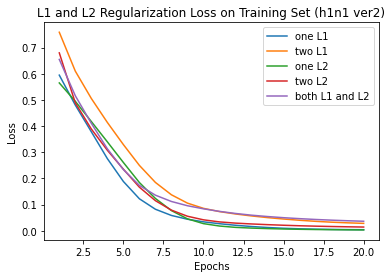

In [56]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_L1_1 = history_h1n1_ver2_L1_1.history
history_dict_h1n1_ver2_L1_2 = history_h1n1_ver2_L1_2.history
history_dict_h1n1_ver2_L2_1 = history_h1n1_ver2_L2_1.history
history_dict_h1n1_ver2_L2_2 = history_h1n1_ver2_L2_2.history
history_dict_h1n1_ver2_L12 = history_h1n1_ver2_L12.history

loss_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["loss"]
loss_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["loss"]
loss_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["loss"]
loss_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["loss"]
loss_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, loss_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, loss_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, loss_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, loss_values_h1n1_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

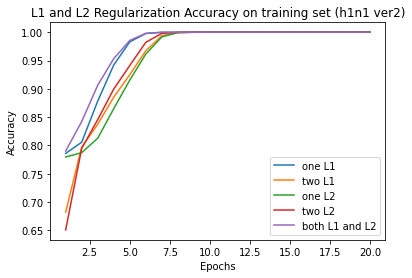

In [57]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["accuracy"]
acc_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["accuracy"]
acc_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["accuracy"]
acc_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["accuracy"]
acc_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, acc_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, acc_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, acc_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, acc_values_h1n1_ver2_L12, label="both L1 and L2")

plt.title("L1 and L2 Regularization Accuracy on training set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

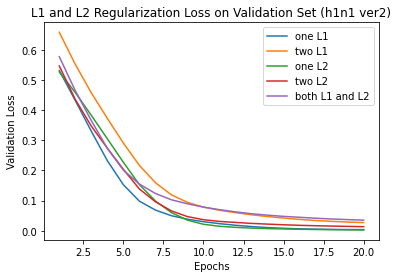

In [58]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["val_loss"]
val_loss_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["val_loss"]
val_loss_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["val_loss"]
val_loss_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["val_loss"]
val_loss_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_h1n1_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.0,0.9])
plt.legend()
plt.show()

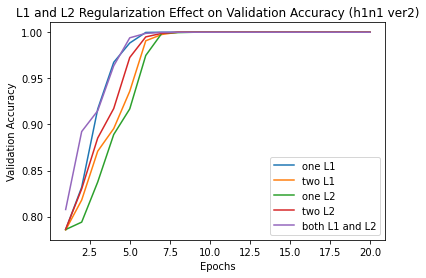

In [59]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["val_accuracy"]
val_acc_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["val_accuracy"]
val_acc_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["val_accuracy"]
val_acc_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["val_accuracy"]
val_acc_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_h1n1_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Effect on Validation Accuracy (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

- model with two L2 regularization layers is robust from overfitting as well as having small loss

## **Hyperparameter effect**

**0.005**

In [60]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_one = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_one.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_one = model_h1n1_ver2_one.fit(x_train_h1n1_ver2,
                                                y_train_h1n1_ver2,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.7277 - accuracy: 0.7778 - val_loss: 0.6554 - val_accuracy: 0.7870
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.6042 - accuracy: 0.7924 - val_loss: 0.5460 - val_accuracy: 0.7950
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4960 - accuracy: 0.8301 - val_loss: 0.4439 - val_accuracy: 0.8655
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.3944 - accuracy: 0.8954 - val_loss: 0.3464 - val_accuracy: 0.9227
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.2974 - accuracy: 0.9490 - val_loss: 0.2562 - val_accuracy: 0.9670
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.2198 - accuracy: 0.9868 - val_loss: 0.1900 - val_accuracy: 0.9958
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1642 - accuracy: 0.9987 - val_loss: 0.1439 - val_accuracy: 0.9994
Epoch 8/20
39/39 [==

**0.002**

In [61]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_two = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_two.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_two = model_h1n1_ver2_two.fit(x_train_h1n1_ver2,
                                                y_train_h1n1_ver2,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.8731 - accuracy: 0.5171 - val_loss: 0.5899 - val_accuracy: 0.7841
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5446 - accuracy: 0.7875 - val_loss: 0.5006 - val_accuracy: 0.7936
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.8117 - val_loss: 0.4170 - val_accuracy: 0.8510
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 0.8654 - val_loss: 0.3305 - val_accuracy: 0.8975
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.2897 - accuracy: 0.9231 - val_loss: 0.2544 - val_accuracy: 0.9577
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.2174 - accuracy: 0.9685 - val_loss: 0.1857 - val_accuracy: 0.9835
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1589 - accuracy: 0.9939 - val_loss: 0.1361 - val_accuracy: 0.9968
Epoch 8/20
39/39 [==

**0.001(original)**

In [67]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_three = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_three.compile(optimizer = "rmsprop",
                               loss = "binary_crossentropy",
                               metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_three = model_h1n1_ver2_three.fit(x_train_h1n1_ver2,
                                                     y_train_h1n1_ver2,
                                                     epochs = 20,
                                                     batch_size = 512,
                                                     validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 2s 13ms/step - loss: 0.5925 - accuracy: 0.7625 - val_loss: 0.5265 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4907 - accuracy: 0.7884 - val_loss: 0.4467 - val_accuracy: 0.7952
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4011 - accuracy: 0.8201 - val_loss: 0.3554 - val_accuracy: 0.8508
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.3111 - accuracy: 0.8855 - val_loss: 0.2732 - val_accuracy: 0.9273
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2342 - accuracy: 0.9449 - val_loss: 0.2037 - val_accuracy: 0.9382
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.1683 - accuracy: 0.9817 - val_loss: 0.1429 - val_accuracy: 0.9974
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.1154 - accuracy: 0.9978 - val_loss: 0.0941 - val_accuracy: 0.9998
Epoch 8/20
39/39 [=

**0.0005**

In [63]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model


model_h1n1_ver2_four = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_four.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_four = model_h1n1_ver2_four.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.5307 - accuracy: 0.7857 - val_loss: 0.4939 - val_accuracy: 0.7863
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.7986 - val_loss: 0.4289 - val_accuracy: 0.8155
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.3883 - accuracy: 0.8389 - val_loss: 0.3529 - val_accuracy: 0.8693
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.3059 - accuracy: 0.8905 - val_loss: 0.2715 - val_accuracy: 0.9037
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.2277 - accuracy: 0.9365 - val_loss: 0.1967 - val_accuracy: 0.9597
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1595 - accuracy: 0.9754 - val_loss: 0.1332 - val_accuracy: 0.9895
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1038 - accuracy: 0.9948 - val_loss: 0.0840 - val_accuracy: 0.9970
Epoch 8/20
39/39 [==

**0.0001**

In [64]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_five = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_five.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_five = model_h1n1_ver2_five.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.7328 - accuracy: 0.5146 - val_loss: 0.5386 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4985 - accuracy: 0.7868 - val_loss: 0.4576 - val_accuracy: 0.8004
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.8181 - val_loss: 0.3714 - val_accuracy: 0.8252
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.8772 - val_loss: 0.2884 - val_accuracy: 0.9086
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.2414 - accuracy: 0.9298 - val_loss: 0.2069 - val_accuracy: 0.9591
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1631 - accuracy: 0.9718 - val_loss: 0.1327 - val_accuracy: 0.9851
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1035 - accuracy: 0.9930 - val_loss: 0.0820 - val_accuracy: 0.9964
Epoch 8/20
39/39 [==

### visualize

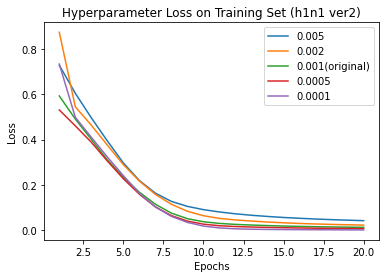

In [68]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_one = history_h1n1_ver2_one.history
history_dict_h1n1_ver2_two = history_h1n1_ver2_two.history
history_dict_h1n1_ver2_three = history_h1n1_ver2_three.history
history_dict_h1n1_ver2_four = history_h1n1_ver2_four.history
history_dict_h1n1_ver2_five = history_h1n1_ver2_five.history

loss_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["loss"]
loss_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["loss"]
loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["loss"]
loss_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["loss"]
loss_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_one) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, loss_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, loss_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, loss_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, loss_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.6])
plt.legend()
plt.show()

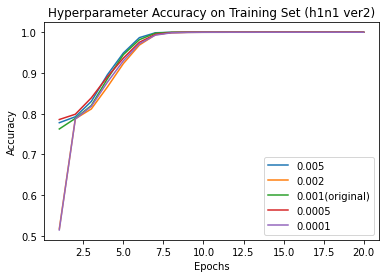

In [69]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["accuracy"]
acc_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["accuracy"]
acc_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["accuracy"]
acc_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["accuracy"]
acc_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_one) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, acc_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, acc_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, acc_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, acc_values_h1n1_ver2_five, label="0.0001")

plt.title("Hyperparameter Accuracy on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

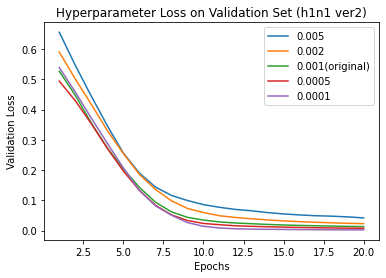

In [70]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["val_loss"]
val_loss_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["val_loss"]
val_loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["val_loss"]
val_loss_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["val_loss"]
val_loss_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_one) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, val_loss_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, val_loss_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, val_loss_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

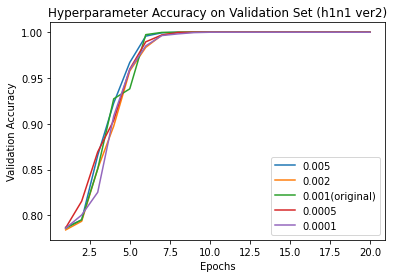

In [71]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["val_accuracy"]
val_acc_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["val_accuracy"]
val_acc_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["val_accuracy"]
val_acc_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["val_accuracy"]
val_acc_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_one) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, val_acc_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, val_acc_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, val_acc_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [72]:
# 수정

from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_onedr = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dropout(0.5),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_onedr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_onedr = model_h1n1_ver2_onedr.fit(x_train_h1n1_ver2,
                                                    y_train_h1n1_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 3s 16ms/step - loss: 0.6429 - accuracy: 0.6540 - val_loss: 0.5379 - val_accuracy: 0.7857
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5429 - accuracy: 0.7814 - val_loss: 0.4825 - val_accuracy: 0.7863
Epoch 3/20
39/39 [==============================] - 0s 8ms/step - loss: 0.5022 - accuracy: 0.7916 - val_loss: 0.4408 - val_accuracy: 0.7974
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4618 - accuracy: 0.8088 - val_loss: 0.3913 - val_accuracy: 0.8315
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4247 - accuracy: 0.8270 - val_loss: 0.3365 - val_accuracy: 0.8639
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.3766 - accuracy: 0.8470 - val_loss: 0.2807 - val_accuracy: 0.9007
Epoch 7/20
39/39 [==============================] - 0s 8ms/step - loss: 0.3350 - accuracy: 0.8666 - val_loss: 0.2253 - val_accuracy: 0.9215
Epoch 8/20
39/39 [=

**# dropout = 2**

In [73]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_twodr = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dropout(0.5),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dropout(0.5),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_twodr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_twodr = model_h1n1_ver2_twodr.fit(x_train_h1n1_ver2,
                                                    y_train_h1n1_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 3s 17ms/step - loss: 0.6718 - accuracy: 0.6292 - val_loss: 0.5186 - val_accuracy: 0.7870
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5489 - accuracy: 0.7524 - val_loss: 0.4511 - val_accuracy: 0.7894
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5020 - accuracy: 0.7812 - val_loss: 0.4140 - val_accuracy: 0.7966
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4720 - accuracy: 0.7980 - val_loss: 0.3773 - val_accuracy: 0.8075
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4392 - accuracy: 0.8116 - val_loss: 0.3462 - val_accuracy: 0.8198
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4120 - accuracy: 0.8234 - val_loss: 0.3105 - val_accuracy: 0.8484
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.3759 - accuracy: 0.8331 - val_loss: 0.2711 - val_accuracy: 0.8768
Epoch 8/20
39/39 [=

### visualize

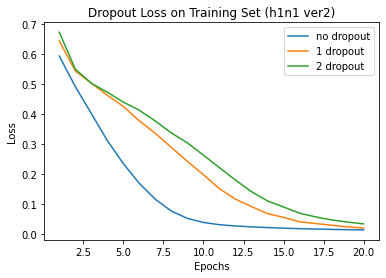

In [74]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_h1n1_ver2_three = history_h1n1_ver2_three.history
history_dict_h1n1_ver2_onedr = history_h1n1_ver2_onedr.history
history_dict_h1n1_ver2_twodr = history_h1n1_ver2_twodr.history

loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["loss"]
loss_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["loss"]
loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["loss"]

epochs = range(1, len(loss_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_three, label="no dropout")
plt.plot(epochs, loss_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, loss_values_h1n1_ver2_twodr, label="2 dropout")

plt.title("Dropout Loss on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

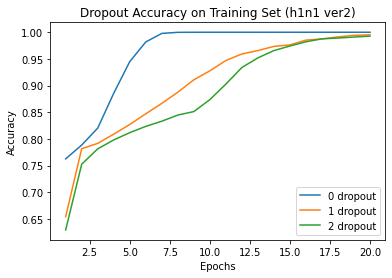

In [75]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["accuracy"]
acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_three, label="0 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_twodr, label="2 dropout")

plt.title("Dropout Accuracy on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

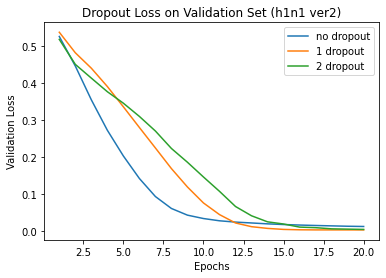

In [76]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["val_loss"]
val_loss_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["val_loss"]
val_loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_three, label="no dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_twodr, label="2 dropout")

plt.title("Dropout Loss on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

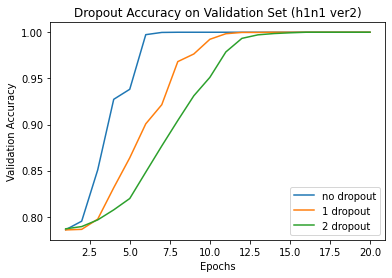

In [77]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["val_accuracy"]
val_acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_three, label="no dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_twodr, label="2 dropout")


plt.title("Dropout Accuracy on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.8**

In [78]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_twodr2 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dropout(0.8),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dropout(0.5),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_twodr2.compile(optimizer = "rmsprop",
                                   loss = "binary_crossentropy",
                                   metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_twodr2 = model_h1n1_ver2_twodr2.fit(x_train_h1n1_ver2,
                                                      y_train_h1n1_ver2,
                                                      epochs = 20,
                                                      batch_size = 512,
                                                       validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.8104 - accuracy: 0.6199 - val_loss: 0.5939 - val_accuracy: 0.7837
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.6501 - accuracy: 0.7157 - val_loss: 0.5664 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.5902 - accuracy: 0.7652 - val_loss: 0.5452 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.5536 - accuracy: 0.7795 - val_loss: 0.5077 - val_accuracy: 0.7859
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5369 - accuracy: 0.7838 - val_loss: 0.4978 - val_accuracy: 0.7859
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5213 - accuracy: 0.7849 - val_loss: 0.4833 - val_accuracy: 0.7859
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.5049 - accuracy: 0.7859 - val_loss: 0.4643 - val_accuracy: 0.7859
Epoch 8/20
39/39 [==

### visualize

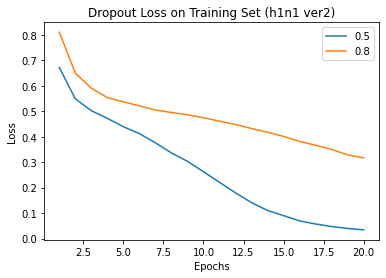

In [79]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_h1n1_ver2_twodr = history_h1n1_ver2_twodr.history
history_dict_h1n1_ver2_twodr2 = history_h1n1_ver2_twodr2.history


loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["loss"]
loss_values_h1n1_ver2_twodr2 = history_dict_h1n1_ver2_twodr2["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_twodr) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_twodr, label="0.5")
plt.plot(epochs, loss_values_h1n1_ver2_twodr2, label="0.8")

plt.title("Dropout Loss on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

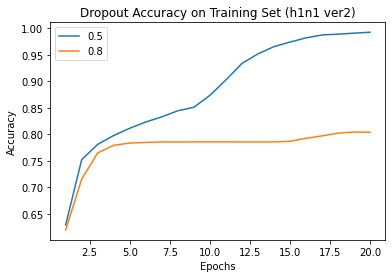

In [80]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["accuracy"]
acc_values_h1n1_ver2_twodr2 = history_dict_h1n1_ver2_twodr2["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_twodr) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_twodr, label="0.5")
plt.plot(epochs, acc_values_h1n1_ver2_twodr2, label="0.8")


plt.title("Dropout Accuracy on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

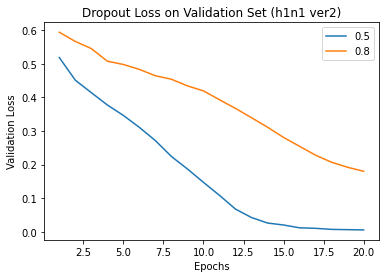

In [81]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_loss"]
val_loss_values_h1n1_ver2_twodr2 = history_dict_h1n1_ver2_twodr2["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_twodr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_twodr, label="0.5")
plt.plot(epochs, val_loss_values_h1n1_ver2_twodr2, label="0.8")


plt.title("Dropout Loss on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

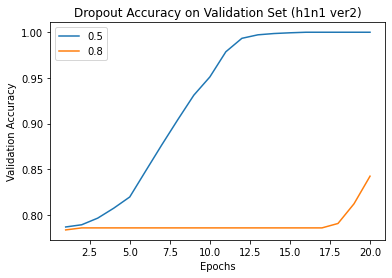

In [82]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_accuracy"]
val_acc_values_h1n1_ver2_twodr2 = history_dict_h1n1_ver2_twodr2["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_twodr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_twodr, label="0.5")
plt.plot(epochs, val_acc_values_h1n1_ver2_twodr2, label="0.8")


plt.title("Dropout Accuracy on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# Seasonal Model.ver1

In [83]:
train_seasonal_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_seasonal_ver1.csv')

In [84]:
print(train_seasonal_ver1.shape)
train_seasonal_ver1.head()

(25026, 22)


,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,seasonal_vaccine
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,2.0,4,1,1,8,1,0.0,0.0,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2.0,4.0,2,1,2,1,2,0.0,0.0,1
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,1,1,2,9,2,2.0,0.0,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,4.0,1.0,5,1,1,5,3,0.0,0.0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,4.0,3,1,1,9,2,1.0,0.0,0


In [85]:
train_seasonal_ver1.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'race',
       'sex', 'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'seasonal_vaccine'],
      dtype='object')

In [86]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_seasonal_ver1.iloc[:,1:-1]
target = train_seasonal_ver1['seasonal_vaccine']

x_train_seasonal_ver1, x_valid_seasonal_ver1, y_train_seasonal_ver1, y_valid_seasonal_ver1 = train_test_split(feature, target, test_size=0.4,shuffle=True,
                                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [87]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_s = keras.Sequential([
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_s.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_s = model_seasonal_ver1_s.fit(x_train_seasonal_ver1,
                                                    y_train_seasonal_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))

Epoch 1/20
30/30 [==============================] - 1s 9ms/step - loss: 1.1594 - accuracy: 0.4876 - val_loss: 0.6807 - val_accuracy: 0.5668
Epoch 2/20
30/30 [==============================] - 0s 4ms/step - loss: 0.6502 - accuracy: 0.6159 - val_loss: 0.6242 - val_accuracy: 0.6507
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.6059 - accuracy: 0.6772 - val_loss: 0.5902 - val_accuracy: 0.6893
Epoch 4/20
30/30 [==============================] - 0s 4ms/step - loss: 0.5774 - accuracy: 0.7034 - val_loss: 0.5692 - val_accuracy: 0.7076
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: 0.5612 - accuracy: 0.7160 - val_loss: 0.5583 - val_accuracy: 0.7178
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5522 - accuracy: 0.7237 - val_loss: 0.5537 - val_accuracy: 0.7226
Epoch 7/20
30/30 [==============================] - 0s 4ms/step - loss: 0.5464 - accuracy: 0.7319 - val_loss: 0.5527 - val_accuracy: 0.7252
Epoch 8/20
30/30 [==

**layer 8개**


In [90]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_b = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_b.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_b = model_seasonal_ver1_b.fit(x_train_seasonal_ver1,
                                                    y_train_seasonal_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
30/30 [==============================] - 3s 35ms/step - loss: 0.6273 - accuracy: 0.6612 - val_loss: 0.5617 - val_accuracy: 0.7200
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5649 - accuracy: 0.7146 - val_loss: 0.5605 - val_accuracy: 0.7096
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5536 - accuracy: 0.7214 - val_loss: 0.5579 - val_accuracy: 0.7273
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5492 - accuracy: 0.7299 - val_loss: 0.5471 - val_accuracy: 0.7310
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5433 - accuracy: 0.7281 - val_loss: 0.5461 - val_accuracy: 0.7293
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5368 - accuracy: 0.7362 - val_loss: 0.5400 - val_accuracy: 0.7385
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5349 - accuracy: 0.7378 - val_loss: 0.5490 - val_accuracy: 0.7313
Epoch 8/20
30

#### visualize

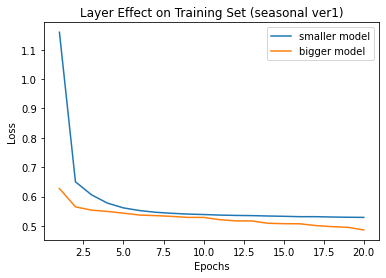

In [91]:
# Layer effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver1_s = history_seasonal_ver1_s.history
history_dict_seasonal_ver1_b = history_seasonal_ver1_b.history

loss_values_seasonal_ver1_s = history_dict_seasonal_ver1_s["loss"]
loss_values_seasonal_ver1_b = history_dict_seasonal_ver1_b["loss"]

epochs = range(1, len(loss_values_seasonal_ver1_s) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_s, label="smaller model")
plt.plot(epochs, loss_values_seasonal_ver1_b, label="bigger model")


plt.title("Layer Effect on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

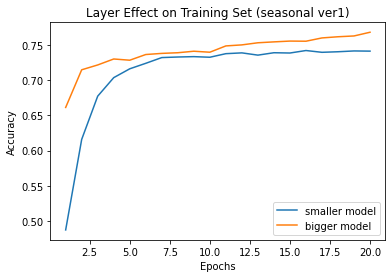

In [92]:
# Layer effect on training accuracy


import matplotlib.pyplot as plt



acc_values_seasonal_ver1_s = history_dict_seasonal_ver1_s["accuracy"]
acc_values_seasonal_ver1_b = history_dict_seasonal_ver1_b["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver1_s) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_s, label="smaller model")
plt.plot(epochs, acc_values_seasonal_ver1_b, label="bigger model")


plt.title("Layer Effect on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

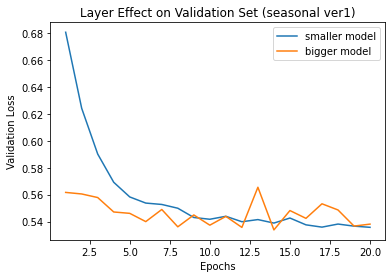

In [93]:
# Layer effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_seasonal_ver1_s = history_dict_seasonal_ver1_s["val_loss"]
val_loss_values_seasonal_ver1_b = history_dict_seasonal_ver1_b["val_loss"]

epochs = range(1, len(val_loss_values_seasonal_ver1_s) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_s, label="smaller model")
plt.plot(epochs, val_loss_values_seasonal_ver1_b, label="bigger model")


plt.title("Layer Effect on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

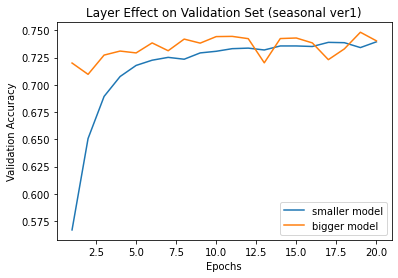

In [94]:
# Layer effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_seasonal_ver1_s = history_dict_seasonal_ver1_s["val_accuracy"]
val_acc_values_seasonal_ver1_b = history_dict_seasonal_ver1_b["val_accuracy"]

epochs = range(1, len(val_acc_values_seasonal_ver1_s) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_s, label="smaller model")
plt.plot(epochs, val_acc_values_seasonal_ver1_b, label="bigger model")


plt.title("Layer Effect on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [95]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L1_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L1_1.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L1_1 = model_seasonal_ver1_L1_1.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
30/30 [==============================] - 2s 29ms/step - loss: 2.1386 - accuracy: 0.6382 - val_loss: 1.6641 - val_accuracy: 0.7195
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 1.4219 - accuracy: 0.7151 - val_loss: 1.1547 - val_accuracy: 0.7257
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.9918 - accuracy: 0.7215 - val_loss: 0.8449 - val_accuracy: 0.7082
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.7457 - accuracy: 0.7272 - val_loss: 0.6779 - val_accuracy: 0.7291
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6523 - accuracy: 0.7309 - val_loss: 0.6565 - val_accuracy: 0.7133
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6184 - accuracy: 0.7299 - val_loss: 0.6056 - val_accuracy: 0.7311
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5997 - accuracy: 0.7355 - val_loss: 0.5911 - val_accuracy: 0.7368
Epoch 8/20
30

**layer 8개 + L1 regularization 2개**

In [96]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L1_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L1_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L1_2 = model_seasonal_ver1_L1_2.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
30/30 [==============================] - 2s 27ms/step - loss: 2.2549 - accuracy: 0.6460 - val_loss: 1.7884 - val_accuracy: 0.7160
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 1.5271 - accuracy: 0.7128 - val_loss: 1.2696 - val_accuracy: 0.7142
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 1.0760 - accuracy: 0.7205 - val_loss: 0.9039 - val_accuracy: 0.7298
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.8256 - accuracy: 0.7219 - val_loss: 0.7683 - val_accuracy: 0.7184
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.7248 - accuracy: 0.7288 - val_loss: 0.7455 - val_accuracy: 0.6849
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6783 - accuracy: 0.7324 - val_loss: 0.6697 - val_accuracy: 0.7251
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6444 - accuracy: 0.7341 - val_loss: 0.6838 - val_accuracy: 0.6874
Epoch 8/20
30

**layer 8개 + L2 regularization 1개**

In [97]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L2_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L2_1 = model_seasonal_ver1_L2_1.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
30/30 [==============================] - 2s 26ms/step - loss: 0.7616 - accuracy: 0.6413 - val_loss: 0.7153 - val_accuracy: 0.6473
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6428 - accuracy: 0.7108 - val_loss: 0.6189 - val_accuracy: 0.7158
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6001 - accuracy: 0.7247 - val_loss: 0.6125 - val_accuracy: 0.7102
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5870 - accuracy: 0.7253 - val_loss: 0.5741 - val_accuracy: 0.7313
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5733 - accuracy: 0.7273 - val_loss: 0.6525 - val_accuracy: 0.6473
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5650 - accuracy: 0.7293 - val_loss: 0.5592 - val_accuracy: 0.7325
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5592 - accuracy: 0.7329 - val_loss: 0.5579 - val_accuracy: 0.7350
Epoch 8/20
30

**layer 8개 + L2 regularization 2개**

In [98]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L2_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L2_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L2_2 = model_seasonal_ver1_L2_2.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
30/30 [==============================] - 2s 26ms/step - loss: 0.7857 - accuracy: 0.6304 - val_loss: 0.6861 - val_accuracy: 0.7133
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6572 - accuracy: 0.7146 - val_loss: 0.6410 - val_accuracy: 0.7133
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6212 - accuracy: 0.7190 - val_loss: 0.6193 - val_accuracy: 0.7008
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5956 - accuracy: 0.7258 - val_loss: 0.6035 - val_accuracy: 0.7203
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5830 - accuracy: 0.7265 - val_loss: 0.5791 - val_accuracy: 0.7317
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5678 - accuracy: 0.7345 - val_loss: 0.5659 - val_accuracy: 0.7339
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5626 - accuracy: 0.7317 - val_loss: 0.5617 - val_accuracy: 0.7341
Epoch 8/20
30

**layer 8개 + L1&L2 regularization 2개**

In [99]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L12 = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L12.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L12 = model_seasonal_ver1_L12.fit(x_train_seasonal_ver1,
                                                        y_train_seasonal_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
30/30 [==============================] - 3s 30ms/step - loss: 2.4188 - accuracy: 0.6492 - val_loss: 1.9317 - val_accuracy: 0.6955
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 1.6225 - accuracy: 0.7099 - val_loss: 1.3233 - val_accuracy: 0.7166
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 1.1230 - accuracy: 0.7211 - val_loss: 0.9627 - val_accuracy: 0.7040
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.8395 - accuracy: 0.7205 - val_loss: 0.7573 - val_accuracy: 0.7298
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.7221 - accuracy: 0.7287 - val_loss: 0.6906 - val_accuracy: 0.7301
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6754 - accuracy: 0.7309 - val_loss: 0.6563 - val_accuracy: 0.7305
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6402 - accuracy: 0.7309 - val_loss: 0.6405 - val_accuracy: 0.7261
Epoch 8/20
30

### visualize

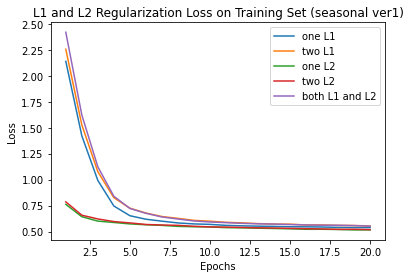

In [100]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver1_L1_1 = history_seasonal_ver1_L1_1.history
history_dict_seasonal_ver1_L1_2 = history_seasonal_ver1_L1_2.history
history_dict_seasonal_ver1_L2_1 = history_seasonal_ver1_L2_1.history
history_dict_seasonal_ver1_L2_2 = history_seasonal_ver1_L2_2.history
history_dict_seasonal_ver1_L12 = history_seasonal_ver1_L12.history

loss_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["loss"]
loss_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["loss"]
loss_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["loss"]
loss_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["loss"]
loss_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["loss"]


epochs = range(1, len(loss_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, loss_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, loss_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, loss_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, loss_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

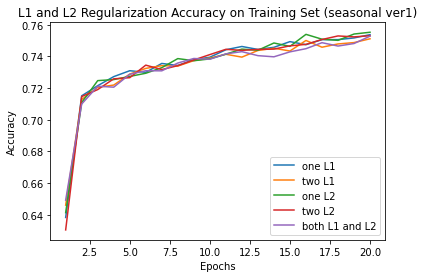

In [101]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["accuracy"]
acc_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["accuracy"]
acc_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["accuracy"]
acc_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["accuracy"]
acc_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, acc_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, acc_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, acc_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, acc_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

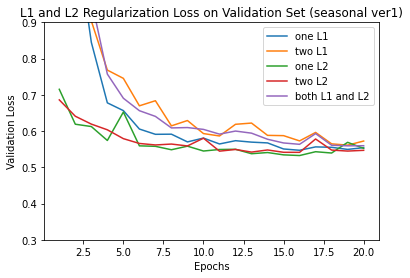

In [102]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


history_dict_seasonal_ver1_L1_1 = history_seasonal_ver1_L1_1.history
history_dict_seasonal_ver1_L1_2 = history_seasonal_ver1_L1_2.history
history_dict_seasonal_ver1_L2_1 = history_seasonal_ver1_L2_1.history
history_dict_seasonal_ver1_L2_2 = history_seasonal_ver1_L2_2.history
history_dict_seasonal_ver1_L12 = history_seasonal_ver1_L12.history


val_loss_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["val_loss"]
val_loss_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["val_loss"]
val_loss_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["val_loss"]
val_loss_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["val_loss"]
val_loss_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.3,0.9])
plt.legend()
plt.show()

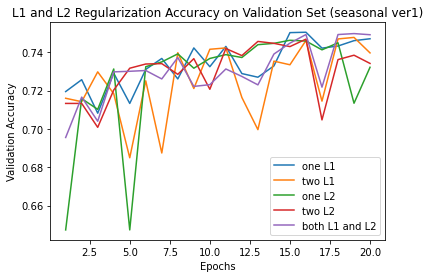

In [103]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["val_accuracy"]
val_acc_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["val_accuracy"]
val_acc_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["val_accuracy"]
val_acc_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["val_accuracy"]
val_acc_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [104]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_one = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_one.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_one = model_seasonal_ver1_one.fit(x_train_seasonal_ver1,
                                                        y_train_seasonal_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
30/30 [==============================] - 2s 26ms/step - loss: 1.2913 - accuracy: 0.6508 - val_loss: 1.0933 - val_accuracy: 0.6741
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.9218 - accuracy: 0.7158 - val_loss: 0.8107 - val_accuracy: 0.7225
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.7495 - accuracy: 0.7219 - val_loss: 0.6940 - val_accuracy: 0.7233
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6577 - accuracy: 0.7279 - val_loss: 0.6293 - val_accuracy: 0.7292
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6140 - accuracy: 0.7315 - val_loss: 0.5995 - val_accuracy: 0.7352
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5896 - accuracy: 0.7350 - val_loss: 0.5984 - val_accuracy: 0.7207
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5730 - accuracy: 0.7349 - val_loss: 0.5795 - val_accuracy: 0.7235
Epoch 8/20
30

**0.002**

In [105]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_two = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_two.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_two = model_seasonal_ver1_two.fit(x_train_seasonal_ver1,
                                                        y_train_seasonal_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
30/30 [==============================] - 2s 27ms/step - loss: 0.9086 - accuracy: 0.6402 - val_loss: 0.7743 - val_accuracy: 0.7184
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.7363 - accuracy: 0.7108 - val_loss: 0.7231 - val_accuracy: 0.6865
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6633 - accuracy: 0.7188 - val_loss: 0.6514 - val_accuracy: 0.7189
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6218 - accuracy: 0.7244 - val_loss: 0.6384 - val_accuracy: 0.7057
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5979 - accuracy: 0.7263 - val_loss: 0.5916 - val_accuracy: 0.7292
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5803 - accuracy: 0.7332 - val_loss: 0.5812 - val_accuracy: 0.7294
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5702 - accuracy: 0.7341 - val_loss: 0.5781 - val_accuracy: 0.7298
Epoch 8/20
30

**0.001(original)**

In [106]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_three = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_three.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_three = model_seasonal_ver1_three.fit(x_train_seasonal_ver1,
                                                            y_train_seasonal_ver1,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
30/30 [==============================] - 2s 26ms/step - loss: 0.7705 - accuracy: 0.6445 - val_loss: 0.6846 - val_accuracy: 0.7175
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6565 - accuracy: 0.7143 - val_loss: 0.6338 - val_accuracy: 0.7218
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6214 - accuracy: 0.7209 - val_loss: 0.6598 - val_accuracy: 0.6752
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5998 - accuracy: 0.7254 - val_loss: 0.5983 - val_accuracy: 0.7266
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5817 - accuracy: 0.7298 - val_loss: 0.5847 - val_accuracy: 0.7267
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5702 - accuracy: 0.7330 - val_loss: 0.5705 - val_accuracy: 0.7310
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5638 - accuracy: 0.7373 - val_loss: 0.5655 - val_accuracy: 0.7301
Epoch 8/20
30

**0.0005**

In [107]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_four = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_four.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_four = model_seasonal_ver1_four.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
30/30 [==============================] - 2s 26ms/step - loss: 0.7013 - accuracy: 0.6466 - val_loss: 0.6207 - val_accuracy: 0.7189
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6153 - accuracy: 0.7201 - val_loss: 0.6286 - val_accuracy: 0.6887
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5938 - accuracy: 0.7209 - val_loss: 0.5947 - val_accuracy: 0.7211
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5832 - accuracy: 0.7215 - val_loss: 0.5786 - val_accuracy: 0.7298
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5715 - accuracy: 0.7279 - val_loss: 0.5659 - val_accuracy: 0.7337
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5614 - accuracy: 0.7366 - val_loss: 0.5880 - val_accuracy: 0.7132
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5564 - accuracy: 0.7356 - val_loss: 0.5812 - val_accuracy: 0.7208
Epoch 8/20
30

**0.0001**

In [108]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_five = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_five.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_five = model_seasonal_ver1_five.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
30/30 [==============================] - 2s 28ms/step - loss: 0.6582 - accuracy: 0.6292 - val_loss: 0.5910 - val_accuracy: 0.7098
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5844 - accuracy: 0.7071 - val_loss: 0.5693 - val_accuracy: 0.7270
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5630 - accuracy: 0.7249 - val_loss: 0.6080 - val_accuracy: 0.6950
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5605 - accuracy: 0.7265 - val_loss: 0.5686 - val_accuracy: 0.7228
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5529 - accuracy: 0.7317 - val_loss: 0.5550 - val_accuracy: 0.7284
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5494 - accuracy: 0.7333 - val_loss: 0.5517 - val_accuracy: 0.7345
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5458 - accuracy: 0.7358 - val_loss: 0.5521 - val_accuracy: 0.7308
Epoch 8/20
30

### visualize

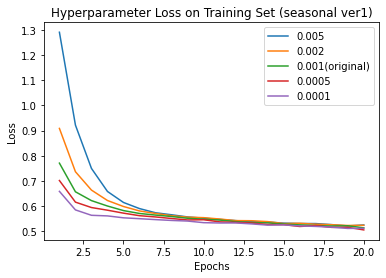

In [109]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver1_one = history_seasonal_ver1_one.history
history_dict_seasonal_ver1_two = history_seasonal_ver1_two.history
history_dict_seasonal_ver1_three = history_seasonal_ver1_three.history
history_dict_seasonal_ver1_four = history_seasonal_ver1_four.history
history_dict_seasonal_ver1_five = history_seasonal_ver1_five.history

loss_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["loss"]
loss_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["loss"]
loss_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["loss"]
loss_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["loss"]
loss_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["loss"]


epochs = range(1, len(loss_values_seasonal_ver1_one) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, loss_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, loss_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, loss_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, loss_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.6])
plt.legend()
plt.show()

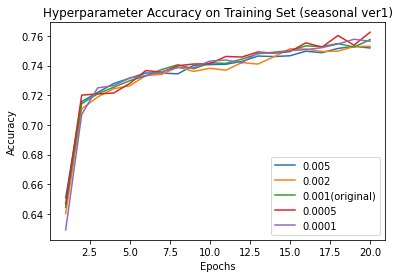

In [110]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["accuracy"]
acc_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["accuracy"]
acc_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["accuracy"]
acc_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["accuracy"]
acc_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver1_one) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, acc_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, acc_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, acc_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, acc_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.7, 0.85])
plt.legend()
plt.show()

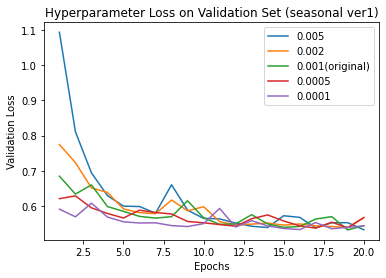

In [111]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["val_loss"]
val_loss_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["val_loss"]
val_loss_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["val_loss"]
val_loss_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["val_loss"]
val_loss_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver1_one) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, val_loss_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, val_loss_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, val_loss_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

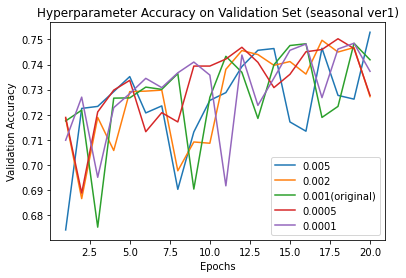

In [112]:
# Hyperparameter effect on validation accuracy

import matplotlib.pyplot as plt


val_acc_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["val_accuracy"]
val_acc_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["val_accuracy"]
val_acc_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["val_accuracy"]
val_acc_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["val_accuracy"]
val_acc_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver1_one) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, val_acc_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, val_acc_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, val_acc_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [113]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_onedr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_onedr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_onedr = model_seasonal_ver1_onedr.fit(x_train_seasonal_ver1,
                                                            y_train_seasonal_ver1,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
30/30 [==============================] - 2s 26ms/step - loss: 0.7733 - accuracy: 0.6567 - val_loss: 0.6984 - val_accuracy: 0.7132
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6697 - accuracy: 0.7136 - val_loss: 0.6426 - val_accuracy: 0.7191
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6358 - accuracy: 0.7213 - val_loss: 0.6106 - val_accuracy: 0.7278
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6150 - accuracy: 0.7225 - val_loss: 0.5949 - val_accuracy: 0.7286
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5929 - accuracy: 0.7289 - val_loss: 0.5963 - val_accuracy: 0.7215
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5831 - accuracy: 0.7319 - val_loss: 0.5899 - val_accuracy: 0.7179
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5720 - accuracy: 0.7362 - val_loss: 0.5985 - val_accuracy: 0.7087
Epoch 8/20
30

**# dropout = 2**

In [114]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_twodr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_twodr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_twodr = model_seasonal_ver1_twodr.fit(x_train_seasonal_ver1,
                                                            y_train_seasonal_ver1,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
30/30 [==============================] - 2s 27ms/step - loss: 0.7884 - accuracy: 0.6401 - val_loss: 0.6888 - val_accuracy: 0.7172
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6901 - accuracy: 0.7066 - val_loss: 0.6417 - val_accuracy: 0.7260
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6414 - accuracy: 0.7199 - val_loss: 0.6288 - val_accuracy: 0.7165
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6151 - accuracy: 0.7267 - val_loss: 0.6631 - val_accuracy: 0.6974
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6035 - accuracy: 0.7283 - val_loss: 0.6033 - val_accuracy: 0.7090
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5886 - accuracy: 0.7332 - val_loss: 0.5732 - val_accuracy: 0.7368
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5803 - accuracy: 0.7354 - val_loss: 0.6123 - val_accuracy: 0.6975
Epoch 8/20
30

**# dropout = 3**

In [115]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_threedr = keras.Sequential([
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu"),
                                                layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_threedr.compile(optimizer = "rmsprop",
                                    loss = "binary_crossentropy",
                                    metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_threedr = model_seasonal_ver1_threedr.fit(x_train_seasonal_ver1,
                                                                y_train_seasonal_ver1,
                                                                epochs = 20,
                                                                batch_size = 512,
                                                                validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
30/30 [==============================] - 3s 41ms/step - loss: 0.8253 - accuracy: 0.5740 - val_loss: 0.7144 - val_accuracy: 0.7086
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.7168 - accuracy: 0.6607 - val_loss: 0.6505 - val_accuracy: 0.7210
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6707 - accuracy: 0.6912 - val_loss: 0.6186 - val_accuracy: 0.7261
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6422 - accuracy: 0.7082 - val_loss: 0.6150 - val_accuracy: 0.6988
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6207 - accuracy: 0.7136 - val_loss: 0.5894 - val_accuracy: 0.7301
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6103 - accuracy: 0.7174 - val_loss: 0.5877 - val_accuracy: 0.7243
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5981 - accuracy: 0.7287 - val_loss: 0.5797 - val_accuracy: 0.7306
Epoch 8/20
30

### visualize

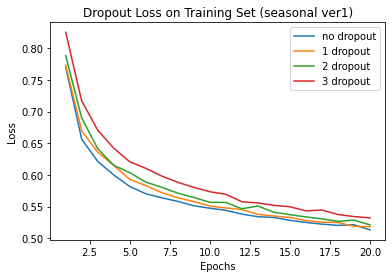

In [116]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_seasonal_ver1_onedr = history_seasonal_ver1_onedr.history
history_dict_seasonal_ver1_twodr = history_seasonal_ver1_twodr.history
history_dict_seasonal_ver1_threedr = history_seasonal_ver1_threedr.history


loss_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["loss"]
loss_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["loss"]
loss_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["loss"]

epochs = range(1, len(loss_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_three, label="no dropout")
plt.plot(epochs, loss_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, loss_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, loss_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

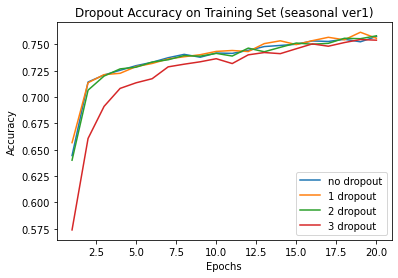

In [117]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["accuracy"]
acc_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["accuracy"]
acc_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_three, label="no dropout")
plt.plot(epochs, acc_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, acc_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, acc_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

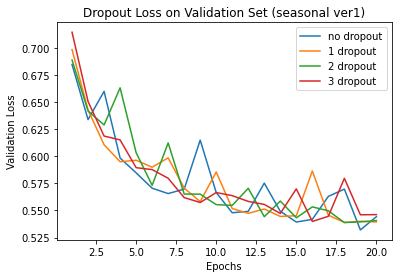

In [118]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt



history_dict_seasonal_ver1_onedr = history_seasonal_ver1_onedr.history
history_dict_seasonal_ver1_twodr = history_seasonal_ver1_twodr.history
history_dict_seasonal_ver1_threedr = history_seasonal_ver1_threedr.history


val_loss_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["val_loss"]
val_loss_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["val_loss"]
val_loss_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["val_loss"]

epochs = range(1, len(val_loss_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_three, label="no dropout")
plt.plot(epochs, val_loss_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

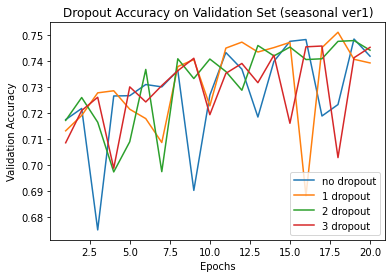

In [119]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["val_accuracy"]
val_acc_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["val_accuracy"]
val_acc_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["val_accuracy"]

epochs = range(1, len(val_acc_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_three, label="no dropout")
plt.plot(epochs, val_acc_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

# Seasonal Model.ver2

In [120]:
train_seasonal_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_seasonal_ver2.csv')

In [121]:
print(train_seasonal_ver2.shape)
train_seasonal_ver2.head()

(25026, 36)


,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0


In [122]:
train_seasonal_ver2.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'sex',
       'household_adults', 'household_children', 'seasonal_vaccine', 'race_1',
       'race_2', 'race_3', 'race_4', 'region_0', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'msa_1', 'msa_2', 'msa_3'],
      dtype='object')

In [123]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_seasonal_ver2.iloc[:,1:-1]
target = train_seasonal_ver2['seasonal_vaccine']

x_train_seasonal_ver2, x_valid_seasonal_ver2, y_train_seasonal_ver2, y_valid_seasonal_ver2 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [124]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_s = keras.Sequential([
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_s.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_s = model_seasonal_ver2_s.fit(x_train_seasonal_ver2,
                                                    y_train_seasonal_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 8ms/step - loss: 0.6081 - accuracy: 0.7556 - val_loss: 0.5288 - val_accuracy: 0.8418
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.8680 - val_loss: 0.4086 - val_accuracy: 0.8652
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3370 - accuracy: 0.9139 - val_loss: 0.2840 - val_accuracy: 0.9389
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9652 - val_loss: 0.1794 - val_accuracy: 0.9826
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1314 - accuracy: 0.9918 - val_loss: 0.0948 - val_accuracy: 0.9974
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0676 - accuracy: 0.9988 - val_loss: 0.0455 - val_accuracy: 0.9998
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9999 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 8/20
40/40 [==

**layer 8개**

In [125]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_b = keras.Sequential([
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(128, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_b.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_b = model_seasonal_ver2_b.fit(x_train_seasonal_ver2,
                                            y_train_seasonal_ver2,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 21ms/step - loss: 0.3978 - accuracy: 0.8162 - val_loss: 0.0545 - val_accuracy: 0.9956
Epoch 2/20
40/40 [==============================] - 1s 15ms/step - loss: 0.0947 - accuracy: 0.9805 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 16ms/step - loss: 4.7450e-04 - accuracy: 1.0000 - val_loss: 1.9128e-04 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 15ms/step - loss: 2.4508e-05 - accuracy: 1.0000 - val_loss: 5.3286e-06 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 15ms/step - loss: 1.7733e-06 - accuracy: 1.0000 - val_loss: 4.9903e-07 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 15ms/step - loss: 1.9285e-07 - accuracy: 1.0000 - val_loss: 9.6145e-08 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 15ms/step - loss: 3.1160e-08 - accuracy: 1.0000 - val_loss: 1.8787e

#### visualize

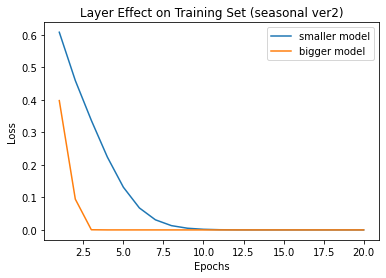

In [126]:
# Layer effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver2_s = history_seasonal_ver2_s.history
history_dict_seasonal_ver2_b = history_seasonal_ver2_b.history

loss_values_seasonal_ver2_s = history_dict_seasonal_ver2_s["loss"]
loss_values_seasonal_ver2_b = history_dict_seasonal_ver2_b["loss"]

epochs = range(1, len(loss_values_seasonal_ver2_s) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_s, label="smaller model")
plt.plot(epochs, loss_values_seasonal_ver2_b, label="bigger model")


plt.title("Layer Effect on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

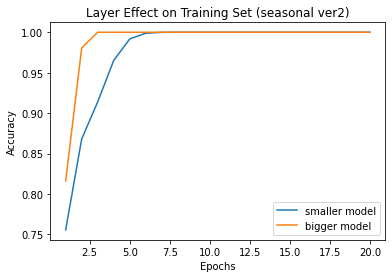

In [127]:
# Layer effect on training accuracy


import matplotlib.pyplot as plt



acc_values_seasonal_ver2_s = history_dict_seasonal_ver2_s["accuracy"]
acc_values_seasonal_ver2_b = history_dict_seasonal_ver2_b["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver2_s) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_s, label="smaller model")
plt.plot(epochs, acc_values_seasonal_ver2_b, label="bigger model")


plt.title("Layer Effect on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

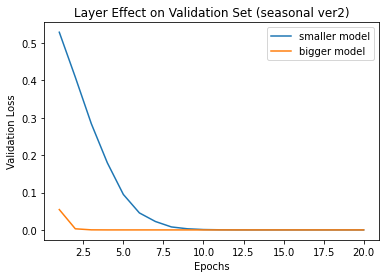

In [128]:
# Layer effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_seasonal_ver2_s = history_dict_seasonal_ver2_s["val_loss"]
val_loss_values_seasonal_ver2_b = history_dict_seasonal_ver2_b["val_loss"]

epochs = range(1, len(val_loss_values_seasonal_ver2_s) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_s, label="smaller model")
plt.plot(epochs, val_loss_values_seasonal_ver2_b, label="bigger model")


plt.title("Layer Effect on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

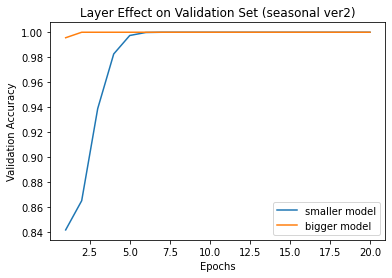

In [129]:
# Layer effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_seasonal_ver2_s = history_dict_seasonal_ver2_s["val_accuracy"]
val_acc_values_seasonal_ver2_b = history_dict_seasonal_ver2_b["val_accuracy"]

epochs = range(1, len(val_acc_values_seasonal_ver2_s) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_s, label="smaller model")
plt.plot(epochs, val_acc_values_seasonal_ver2_b, label="bigger model")


plt.title("Layer Effect on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **L1, L2 regularization effect**

**layer 3개 + L1 regularization 1개**

In [130]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L1_1 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L1_1.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L1_1 = model_seasonal_ver2_L1_1.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.7864 - accuracy: 0.5509 - val_loss: 0.7031 - val_accuracy: 0.6199
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.7579 - val_loss: 0.5757 - val_accuracy: 0.8274
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5103 - accuracy: 0.8665 - val_loss: 0.4395 - val_accuracy: 0.9025
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3709 - accuracy: 0.9390 - val_loss: 0.3093 - val_accuracy: 0.9610
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2511 - accuracy: 0.9800 - val_loss: 0.2007 - val_accuracy: 0.9900
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1576 - accuracy: 0.9964 - val_loss: 0.1199 - val_accuracy: 0.9988
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0959 - accuracy: 0.9998 - val_loss: 0.0784 - val_accuracy: 0.9998
Epoch 8/20
40/40 [==

**layer 3개 + L1 regularization 2개**

In [131]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers



# building model

model_seasonal_ver2_L1_2 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L1_2.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L1_2 = model_seasonal_ver2_L1_2.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 0.7678 - accuracy: 0.6632 - val_loss: 0.6946 - val_accuracy: 0.7285
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.7923 - val_loss: 0.5452 - val_accuracy: 0.8402
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.4740 - accuracy: 0.8914 - val_loss: 0.4109 - val_accuracy: 0.9315
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.3466 - accuracy: 0.9571 - val_loss: 0.2903 - val_accuracy: 0.9784
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.2441 - accuracy: 0.9895 - val_loss: 0.2074 - val_accuracy: 0.9960
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1747 - accuracy: 0.9984 - val_loss: 0.1497 - val_accuracy: 0.9994
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1287 - accuracy: 0.9999 - val_loss: 0.1166 - val_accuracy: 1.0000
Epoch 8/20
40/40 [==

**layer 3개 + L2 regularization 1개**

In [132]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L2_1 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L2_1.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L2_1 = model_seasonal_ver2_L2_1.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 0.6332 - accuracy: 0.6700 - val_loss: 0.5630 - val_accuracy: 0.7325
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.4957 - accuracy: 0.8011 - val_loss: 0.4307 - val_accuracy: 0.8558
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3639 - accuracy: 0.9013 - val_loss: 0.3179 - val_accuracy: 0.9245
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2414 - accuracy: 0.9678 - val_loss: 0.1919 - val_accuracy: 0.9818
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1488 - accuracy: 0.9921 - val_loss: 0.1172 - val_accuracy: 0.9970
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.9987 - val_loss: 0.0717 - val_accuracy: 0.9998
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9998 - val_loss: 0.0391 - val_accuracy: 1.0000
Epoch 8/20
40/40 [==

**layer 3개 + L2 regularization 2개**

In [133]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model


model_seasonal_ver2_L2_2 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L2_2.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L2_2 = model_seasonal_ver2_L2_2.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 0.7383 - accuracy: 0.5743 - val_loss: 0.6745 - val_accuracy: 0.6342
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6263 - accuracy: 0.7131 - val_loss: 0.5784 - val_accuracy: 0.7547
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.8040 - val_loss: 0.4781 - val_accuracy: 0.8178
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8805 - val_loss: 0.3568 - val_accuracy: 0.9055
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2998 - accuracy: 0.9425 - val_loss: 0.2628 - val_accuracy: 0.9541
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2089 - accuracy: 0.9814 - val_loss: 0.1712 - val_accuracy: 0.9944
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1375 - accuracy: 0.9980 - val_loss: 0.1164 - val_accuracy: 0.9988
Epoch 8/20
40/40 [==

**layer 3개 + L1&L2 regularization 2개**

In [134]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L12 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L12.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L12 = model_seasonal_ver2_L12.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 0.8111 - accuracy: 0.6470 - val_loss: 0.7472 - val_accuracy: 0.7329
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.7899 - val_loss: 0.6291 - val_accuracy: 0.8268
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.8614 - val_loss: 0.5093 - val_accuracy: 0.8867
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.9172 - val_loss: 0.4026 - val_accuracy: 0.9353
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3486 - accuracy: 0.9602 - val_loss: 0.3062 - val_accuracy: 0.9780
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.9898 - val_loss: 0.2312 - val_accuracy: 0.9912
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1911 - accuracy: 0.9985 - val_loss: 0.1631 - val_accuracy: 0.9990
Epoch 8/20
40/40 [==

### visualize

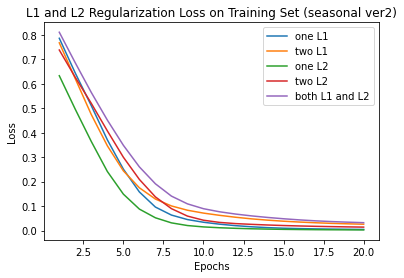

In [135]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver2_L1_1 = history_seasonal_ver2_L1_1.history
history_dict_seasonal_ver2_L1_2 = history_seasonal_ver2_L1_2.history
history_dict_seasonal_ver2_L2_1 = history_seasonal_ver2_L2_1.history
history_dict_seasonal_ver2_L2_2 = history_seasonal_ver2_L2_2.history
history_dict_seasonal_ver2_L12 = history_seasonal_ver2_L12.history

loss_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["loss"]
loss_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["loss"]
loss_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["loss"]
loss_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["loss"]
loss_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["loss"]


epochs = range(1, len(loss_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, loss_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, loss_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, loss_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, loss_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

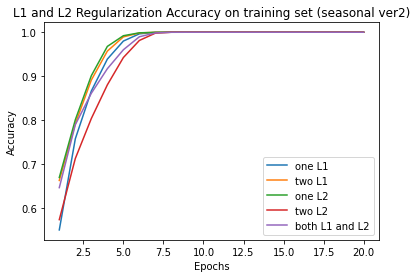

In [136]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["accuracy"]
acc_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["accuracy"]
acc_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["accuracy"]
acc_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["accuracy"]
acc_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, acc_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, acc_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, acc_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, acc_values_seasonal_ver2_L12, label="both L1 and L2")

plt.title("L1 and L2 Regularization Accuracy on training set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

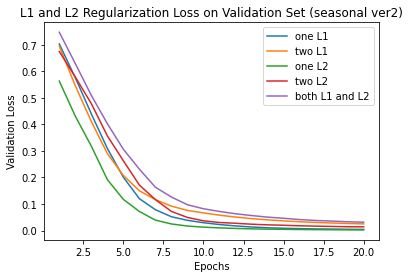

In [137]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["val_loss"]
val_loss_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["val_loss"]
val_loss_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["val_loss"]
val_loss_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["val_loss"]
val_loss_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

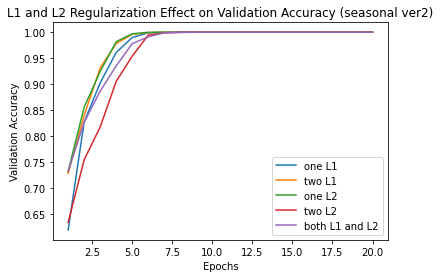

In [138]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["val_accuracy"]
val_acc_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["val_accuracy"]
val_acc_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["val_accuracy"]
val_acc_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["val_accuracy"]
val_acc_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Effect on Validation Accuracy (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [139]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_one = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_one.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_one = model_seasonal_ver2_one.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 0.7256 - accuracy: 0.6680 - val_loss: 0.6799 - val_accuracy: 0.7014
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6260 - accuracy: 0.7486 - val_loss: 0.5795 - val_accuracy: 0.7781
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5152 - accuracy: 0.8210 - val_loss: 0.4537 - val_accuracy: 0.8516
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3811 - accuracy: 0.8941 - val_loss: 0.3169 - val_accuracy: 0.9303
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2544 - accuracy: 0.9635 - val_loss: 0.2102 - val_accuracy: 0.9814
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1606 - accuracy: 0.9937 - val_loss: 0.1411 - val_accuracy: 0.9960
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 0.9991 - val_loss: 0.0820 - val_accuracy: 0.9998
Epoch 8/20
40/40 [==

**0.002**

In [140]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_two = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_two.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_two = model_seasonal_ver2_two.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 0.6979 - accuracy: 0.6405 - val_loss: 0.6231 - val_accuracy: 0.7311
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5603 - accuracy: 0.8000 - val_loss: 0.4955 - val_accuracy: 0.8420
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.4352 - accuracy: 0.8711 - val_loss: 0.3857 - val_accuracy: 0.8909
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3234 - accuracy: 0.9258 - val_loss: 0.2751 - val_accuracy: 0.9489
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.9710 - val_loss: 0.1797 - val_accuracy: 0.9888
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1456 - accuracy: 0.9949 - val_loss: 0.1200 - val_accuracy: 0.9978
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0913 - accuracy: 0.9997 - val_loss: 0.0728 - val_accuracy: 1.0000
Epoch 8/20
40/40 [==

**0.001(original)**

In [141]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_three = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_three.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_three = model_seasonal_ver2_three.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.6990 - accuracy: 0.5890 - val_loss: 0.6541 - val_accuracy: 0.6944
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.7720 - val_loss: 0.5082 - val_accuracy: 0.8164
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.4390 - accuracy: 0.8609 - val_loss: 0.3898 - val_accuracy: 0.8746
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3252 - accuracy: 0.9182 - val_loss: 0.2763 - val_accuracy: 0.9397
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.9661 - val_loss: 0.1819 - val_accuracy: 0.9840
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1406 - accuracy: 0.9933 - val_loss: 0.1134 - val_accuracy: 0.9958
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9993 - val_loss: 0.0611 - val_accuracy: 0.9998
Epoch 8/20
40/40 [==

**0.0005**

In [142]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model


model_seasonal_ver2_four = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_four.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_four = model_seasonal_ver2_four.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.6754 - accuracy: 0.5911 - val_loss: 0.6094 - val_accuracy: 0.7161
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5597 - accuracy: 0.7555 - val_loss: 0.5209 - val_accuracy: 0.7781
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.8128 - val_loss: 0.4422 - val_accuracy: 0.8146
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8651 - val_loss: 0.3346 - val_accuracy: 0.8941
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2782 - accuracy: 0.9277 - val_loss: 0.2328 - val_accuracy: 0.9503
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1815 - accuracy: 0.9731 - val_loss: 0.1423 - val_accuracy: 0.9882
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1089 - accuracy: 0.9941 - val_loss: 0.0820 - val_accuracy: 0.9976
Epoch 8/20
40/40 [==

**0.0001**

In [143]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_five = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_five.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_five = model_seasonal_ver2_five.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.6802 - accuracy: 0.5615 - val_loss: 0.6601 - val_accuracy: 0.5913
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6176 - accuracy: 0.6708 - val_loss: 0.5858 - val_accuracy: 0.7080
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5447 - accuracy: 0.7544 - val_loss: 0.5188 - val_accuracy: 0.7725
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.4750 - accuracy: 0.8076 - val_loss: 0.4565 - val_accuracy: 0.8110
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3993 - accuracy: 0.8591 - val_loss: 0.3690 - val_accuracy: 0.8708
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3125 - accuracy: 0.9108 - val_loss: 0.2768 - val_accuracy: 0.9287
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2318 - accuracy: 0.9532 - val_loss: 0.2125 - val_accuracy: 0.9547
Epoch 8/20
40/40 [==

### visualize

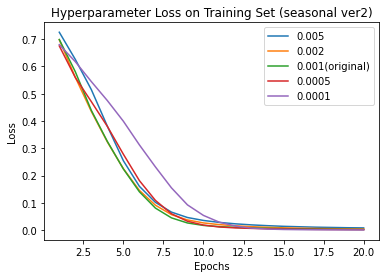

In [144]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver2_one = history_seasonal_ver2_one.history
history_dict_seasonal_ver2_two = history_seasonal_ver2_two.history
history_dict_seasonal_ver2_three = history_seasonal_ver2_three.history
history_dict_seasonal_ver2_four = history_seasonal_ver2_four.history
history_dict_seasonal_ver2_five = history_seasonal_ver2_five.history

loss_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["loss"]
loss_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["loss"]
loss_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["loss"]
loss_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["loss"]
loss_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["loss"]


epochs = range(1, len(loss_values_seasonal_ver2_one) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, loss_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, loss_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, loss_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, loss_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.6])
plt.legend()
plt.show()

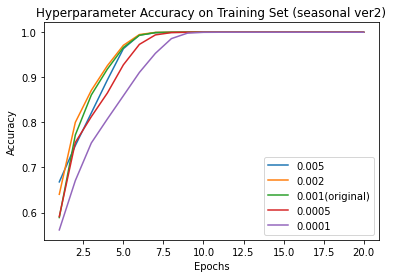

In [145]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["accuracy"]
acc_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["accuracy"]
acc_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["accuracy"]
acc_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["accuracy"]
acc_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver2_one) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, acc_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, acc_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, acc_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, acc_values_seasonal_ver2_five, label="0.0001")

plt.title("Hyperparameter Accuracy on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

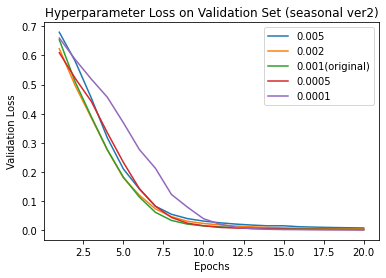

In [146]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["val_loss"]
val_loss_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["val_loss"]
val_loss_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["val_loss"]
val_loss_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["val_loss"]
val_loss_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_one) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, val_loss_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, val_loss_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, val_loss_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

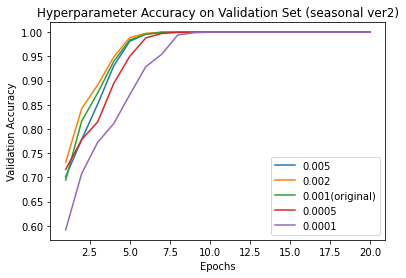

In [147]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["val_accuracy"]
val_acc_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["val_accuracy"]
val_acc_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["val_accuracy"]
val_acc_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["val_accuracy"]
val_acc_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["val_accuracy"]



epochs = range(1, len(val_acc_values_seasonal_ver2_one) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, val_acc_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, val_acc_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, val_acc_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [148]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_onedr = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dropout(0.5),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_onedr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_onedr = model_seasonal_ver2_onedr.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 3s 20ms/step - loss: 0.7405 - accuracy: 0.5153 - val_loss: 0.6962 - val_accuracy: 0.5725
Epoch 2/20
40/40 [==============================] - 0s 7ms/step - loss: 0.6767 - accuracy: 0.6044 - val_loss: 0.6448 - val_accuracy: 0.7305
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6275 - accuracy: 0.6709 - val_loss: 0.5728 - val_accuracy: 0.7887
Epoch 4/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5697 - accuracy: 0.7265 - val_loss: 0.4925 - val_accuracy: 0.8380
Epoch 5/20
40/40 [==============================] - 0s 10ms/step - loss: 0.5127 - accuracy: 0.7672 - val_loss: 0.4329 - val_accuracy: 0.8580
Epoch 6/20
40/40 [==============================] - 0s 9ms/step - loss: 0.4605 - accuracy: 0.7965 - val_loss: 0.3622 - val_accuracy: 0.9025
Epoch 7/20
40/40 [==============================] - 0s 11ms/step - loss: 0.4072 - accuracy: 0.8277 - val_loss: 0.2942 - val_accuracy: 0.9209
Epoch 8/20
40/40 

**# dropout = 2**

In [149]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_twodr = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dropout(0.5),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dropout(0.5),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_twodr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_twodr = model_seasonal_ver2_twodr.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 14ms/step - loss: 0.9248 - accuracy: 0.5237 - val_loss: 0.6529 - val_accuracy: 0.6870
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.7355 - accuracy: 0.5626 - val_loss: 0.6314 - val_accuracy: 0.7867
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6330 - val_loss: 0.5942 - val_accuracy: 0.7928
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6060 - accuracy: 0.6816 - val_loss: 0.5293 - val_accuracy: 0.8496
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5548 - accuracy: 0.7298 - val_loss: 0.4544 - val_accuracy: 0.8887
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5006 - accuracy: 0.7701 - val_loss: 0.3634 - val_accuracy: 0.9193
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.4325 - accuracy: 0.8165 - val_loss: 0.2795 - val_accuracy: 0.9455
Epoch 8/20
40/40 [=

### visualize

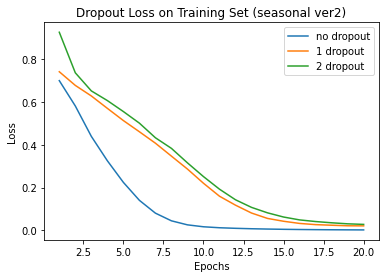

In [150]:
# Dropout effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver2_three = history_seasonal_ver2_three.history
history_dict_seasonal_ver2_onedr = history_seasonal_ver2_onedr.history
history_dict_seasonal_ver2_twodr = history_seasonal_ver2_twodr.history

loss_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["loss"]
loss_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["loss"]
loss_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["loss"]

epochs = range(1, len(loss_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_three, label="no dropout")
plt.plot(epochs, loss_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, loss_values_seasonal_ver2_twodr, label="2 dropout")

plt.title("Dropout Loss on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

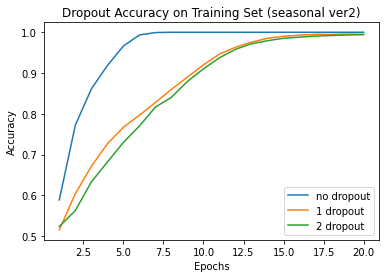

In [151]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["accuracy"]
acc_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["accuracy"]
acc_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_three, label="no dropout")
plt.plot(epochs, acc_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, acc_values_seasonal_ver2_twodr, label="2 dropout")

plt.title("Dropout Accuracy on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

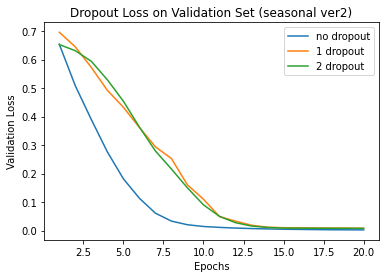

In [152]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["val_loss"]
val_loss_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["val_loss"]
val_loss_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_three, label="no dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_twodr, label="2 dropout")

plt.title("Dropout Loss on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

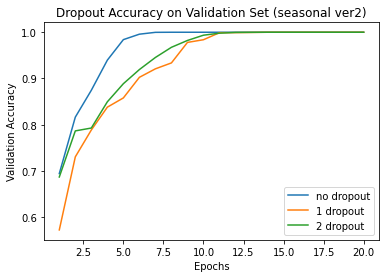

In [153]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["val_accuracy"]
val_acc_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["val_accuracy"]
val_acc_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["val_accuracy"]



epochs = range(1, len(val_acc_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_three, label="no dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_twodr, label="2 dropout")


plt.title("Dropout Accuracy on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.8**

In [154]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_onedr2 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dropout(0.8),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_onedr2.compile(optimizer = "rmsprop",
                                   loss = "binary_crossentropy",
                                   metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_onedr2 = model_seasonal_ver2_onedr2.fit(x_train_seasonal_ver2,
                                                              y_train_seasonal_ver2,
                                                              epochs = 20,
                                                              batch_size = 512,
                                                              validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 0.7175 - accuracy: 0.5062 - val_loss: 0.6846 - val_accuracy: 0.5829
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5514 - val_loss: 0.6700 - val_accuracy: 0.6360
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.5796 - val_loss: 0.6497 - val_accuracy: 0.6882
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6603 - accuracy: 0.6007 - val_loss: 0.6267 - val_accuracy: 0.7183
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6437 - accuracy: 0.6229 - val_loss: 0.6006 - val_accuracy: 0.7595
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6288 - accuracy: 0.6387 - val_loss: 0.5661 - val_accuracy: 0.7934
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.6603 - val_loss: 0.5275 - val_accuracy: 0.8238
Epoch 8/20
40/40 [==

### visualize

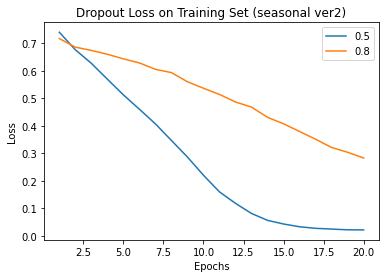

In [155]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_seasonal_ver2_onedr = history_seasonal_ver2_onedr.history
history_dict_seasonal_ver2_onedr2 = history_seasonal_ver2_onedr2.history


loss_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["loss"]
loss_values_seasonal_ver2_onedr2 = history_dict_seasonal_ver2_onedr2["loss"]


epochs = range(1, len(loss_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_onedr, label="0.5")
plt.plot(epochs, loss_values_seasonal_ver2_onedr2, label="0.8")

plt.title("Dropout Loss on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

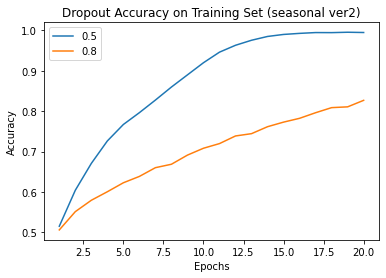

In [156]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["accuracy"]
acc_values_seasonal_ver2_onedr2 = history_dict_seasonal_ver2_onedr2["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_onedr, label="0.5")
plt.plot(epochs, acc_values_seasonal_ver2_onedr2, label="0.8")


plt.title("Dropout Accuracy on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

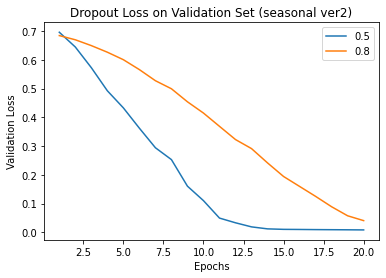

In [157]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["val_loss"]
val_loss_values_seasonal_ver2_onedr2 = history_dict_seasonal_ver2_onedr2["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_onedr, label="0.5")
plt.plot(epochs, val_loss_values_seasonal_ver2_onedr2, label="0.8")


plt.title("Dropout Loss on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

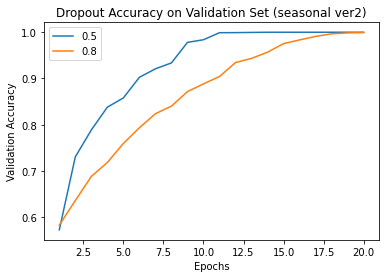

In [158]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["val_accuracy"]
val_acc_values_seasonal_ver2_onedr2 = history_dict_seasonal_ver2_onedr2["val_accuracy"]



epochs = range(1, len(val_acc_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_onedr, label="0.5")
plt.plot(epochs, val_acc_values_seasonal_ver2_onedr2, label="0.8")


plt.title("Dropout Accuracy on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# Predict

In [159]:
sub_frmt = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/submission_format.csv')

In [160]:
sub_frmt.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


#### Predict ver1

**h1n1_vaccine**

In [161]:
test_h1n1_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_h1n1_ver1.csv')

In [162]:
test_h1n1_ver1.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,5.0,1.0,1.0,2,4,1,7,2,1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,1,1,2,1,1,3.0,0.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,5.0,4.0,2.0,4,1,2,5,1,1.0,0.0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,5,1,1,5,2,1.0,0.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,5.0,2.0,4.0,2,2,1,6,1,0.0,1.0


In [163]:
test_h1n1_ver1 = test_h1n1_ver1.drop(['respondent_id'], axis = 1)
test_h1n1_ver1.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,5.0,1.0,1.0,2,4,1,7,2,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,1,1,2,1,1,3.0,0.0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,5.0,4.0,2.0,4,1,2,5,1,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,2.0,2.0,5,1,1,5,2,1.0,0.0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,5.0,2.0,4.0,2,2,1,6,1,0.0,1.0


In [164]:
pred_h1n1_ver1 = model_h1n1_ver1_twodr.predict(test_h1n1_ver1)

In [165]:
pred_h1n1_ver1

array([[0.06943679],
       [0.0765045 ],
       [0.62870204],
       ...,
       [0.18311474],
       [0.06685594],
       [0.1568223 ]], dtype=float32)

In [166]:
sub_frmt['h1n1_vaccine'] = pred_h1n1_ver1

**seasonal_vaccine**

In [167]:
test_seasonal_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_seasonal_ver1.csv')

In [168]:
test_seasonal_ver1.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children
0,26707,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,5.0,1.0,1.0,2,4,1,7,2,1.0,0.0
1,26708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,1,1,2,1,1,3.0,0.0
2,26709,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,5.0,4.0,4.0,4,1,2,5,1,1.0,0.0
3,26710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,4.0,2.0,5,1,1,5,2,1.0,0.0
4,26711,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,4.0,4.0,2.0,2,2,1,6,1,0.0,1.0


In [169]:
test_seasonal_ver1 = test_seasonal_ver1.drop(['respondent_id'], axis = 1)
test_seasonal_ver1.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,1.0,1.0,2,4,1,7,2,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1,1,2,1,1,3.0,0.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4,1,2,5,1,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0,2.0,5,1,1,5,2,1.0,0.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,2,2,1,6,1,0.0,1.0


In [170]:
pred_seasonal_ver1 = model_seasonal_ver1_twodr.predict(test_seasonal_ver1)

In [171]:
pred_seasonal_ver1

array([[0.19633421],
       [0.06893492],
       [0.6756663 ],
       ...,
       [0.23043919],
       [0.62459993],
       [0.7381087 ]], dtype=float32)

In [172]:
sub_frmt['seasonal_vaccine'] = pred_seasonal_ver1

**submission_ver1**

In [173]:
submission_ver1 = sub_frmt[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]

In [174]:
submission_ver1.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.069437,0.196334
1,26708,0.076504,0.068935
2,26709,0.628702,0.675666
3,26710,0.260916,0.711773
4,26711,0.375453,0.700377


In [175]:
submission_ver1.to_csv('submission_ver1.csv', index=False)

## 셀 실행 후 왼쪽 파일 모양 클릭하고 'submission_ver21.csv' 파일을 다운받으면 됨.

#### Predict ver2

**h1n1_vaccine**

In [176]:
test_h1n1_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_h1n1_ver2.csv')

In [177]:
test_h1n1_ver2.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,1,0,0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0


In [178]:
test_h1n1_ver2 = test_h1n1_ver2.drop(['respondent_id'], axis = 1)
test_h1n1_ver2.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,0,1,0,0,0,0,1,0,0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,1,0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,0


In [179]:
pred_h1n1_ver2 = model_h1n1_ver2_twodr2.predict(test_h1n1_ver2)

In [180]:
pred_h1n1_ver2

array([[0.00072116],
       [0.40572765],
       [0.5042284 ],
       ...,
       [0.53543794],
       [0.39029053],
       [0.4384391 ]], dtype=float32)

In [181]:
sub_frmt['h1n1_vaccine'] = pred_h1n1_ver2

**seasonal_vaccine**

In [182]:
test_seasonal_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_seasonal_ver2.csv')

In [183]:
test_seasonal_ver2.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,26707,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,26708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,26709,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
3,26710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,26711,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0


In [184]:
test_seasonal_ver2 = test_seasonal_ver2.drop(['respondent_id'], axis = 1)
test_seasonal_ver2.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,1,0,0


In [185]:
pred_seasonal_ver2 = model_seasonal_ver2_onedr2.predict(test_seasonal_ver2)

In [186]:
pred_seasonal_ver2

array([[0.06033635],
       [0.9429554 ],
       [0.97714937],
       ...,
       [0.9851532 ],
       [0.9870657 ],
       [0.9907508 ]], dtype=float32)

In [187]:
sub_frmt['seasonal_vaccine'] = pred_seasonal_ver2

**submission_ver2**

In [188]:
submission_ver2 = sub_frmt[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]

In [189]:
submission_ver2.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.000721,0.060336
1,26708,0.405728,0.942955
2,26709,0.504228,0.977149
3,26710,0.506812,0.994845
4,26711,0.000673,0.090933


In [190]:
submission_ver2.to_csv('submission_ver2.csv', index=False)

## 셀 실행 후 왼쪽 파일 모양 클릭하고 'submission_ver2.csv' 파일을 다운받으면 됨.